## Findings
    -> We can see different heat map for differnt test data, while most of them have different error rate.
    -> We can see that the heat map would be different consideing the fact that, error rate is different.
    -> We would probbaly generate different heat map, for different range of errors.

## Research path -
    -> Ways to improve the model performace using/through/by XAI
## Tasks -
    -> Generate Attention Map
    -> Do perturbation analysis/ add or remove data points/ Use any classification technique to improve model performance
    -> Use some other technique using XAI and compare the results
    -> Propose some novel technique
    -> Create seperate model for different cities


## Writing suggession
    -> Have to write why, demand forecasting is important
    -> The money issue, And what we are tring to achieve from the thesis


# Improvements suggested -
    -> Add window feature
    -> Add lag feature from previous week same day
    -> Add skill score
    -> Use absolute error for test data
    -> Use baseline forescast to evaluate the model


In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../helper/')

In [2]:
import data as data_helper
import math
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import model as model_helper
import config
import localStorage

Choosen device cuda


## Global variables

In [3]:
summery = { "Global": {} }

## Load the data


In [4]:
train = data_helper.load_train_data()

In [23]:
train['place'].unique()

array(['bergen', 'helsingfors', 'oslo', 'stavanger', 'tromsÃ¸',
       'trondheim'], dtype=object)

<AxesSubplot:xlabel='place'>

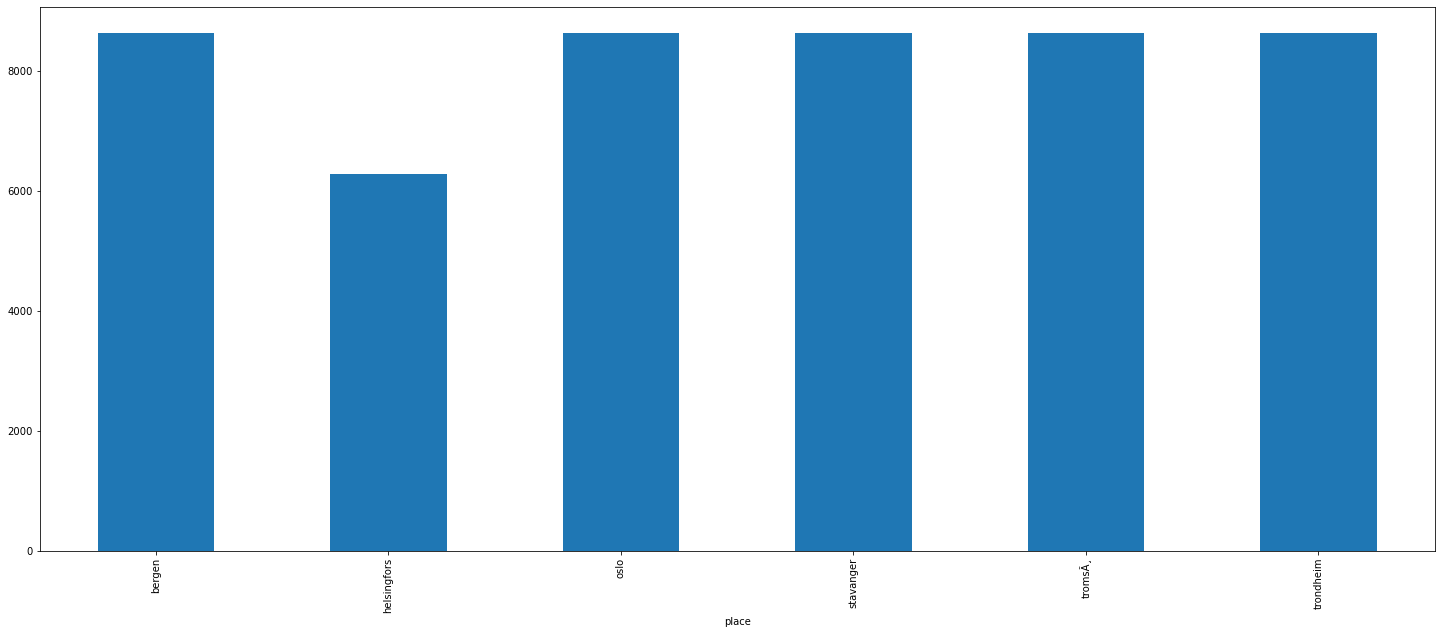

In [5]:
train.groupby(['place'])['temperature'].count().plot(kind='bar', figsize=(25, 10))

<AxesSubplot:xlabel='time,time'>

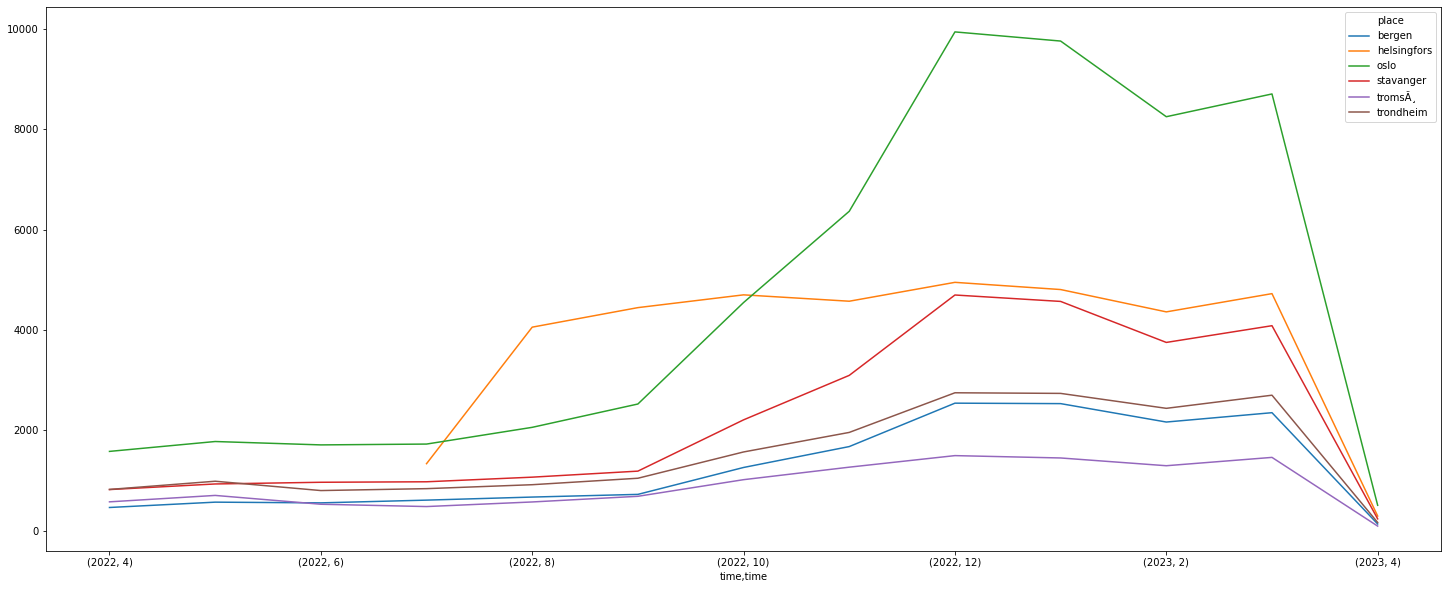

In [6]:
train.groupby([train.index.year, train.index.month, 'place'])['demand'].sum().unstack().plot(figsize=(25, 10))


In [22]:
train = data_helper.filter_global_train_data(train)


            date        place  count
0     2022-04-07       bergen      3
1     2022-04-07         oslo      3
2     2022-04-07    stavanger      3
3     2022-04-07      tromsÃ¸      3
4     2022-04-07    trondheim      3
491   2022-07-14  helsingfors      3
2062  2023-04-02       bergen     22
2063  2023-04-02  helsingfors     22
2064  2023-04-02         oslo     22
2065  2023-04-02    stavanger     22
2066  2023-04-02      tromsÃ¸     22
2067  2023-04-02    trondheim     22


In [8]:
train.head()


,place,temperature,demand
time,,,
2022-04-08 00:00:00,bergen,-1.1,0.984202
2022-04-08 01:00:00,bergen,-0.7,0.950335
2022-04-08 02:00:00,bergen,-0.9,0.977533
2022-04-08 03:00:00,bergen,-0.9,0.965054
2022-04-08 04:00:00,bergen,-1.6,1.024541


# Data analysis


In [9]:
train.isna().sum()


place          0
temperature    0
demand         0
dtype: int64

## Feature engineering


- Time Feature Extraction\
  -> Year\
  -> month_cos\
  -> month_sin\
  -> day_cos\
  -> day_sin\
  -> hour_cos\
  -> hour_sin\
  -> Public holiday or not\
  -> Daylight savings or not\
  -> Weekend or not\
  -> Business hour or not\
  -> Season of the year


In [10]:
train_1 = data_helper.add_feature(train)


In [11]:
train_1.head()

,place,temperature,demand,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,season,weekend,daylight,holiday
time,,,,,,,,,,,,,,
2022-04-08 00:00:00,bergen,-1.1,0.984202,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,spring,0,1,0
2022-04-08 01:00:00,bergen,-0.7,0.950335,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,spring,0,1,0
2022-04-08 02:00:00,bergen,-0.9,0.977533,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,spring,0,1,0
2022-04-08 03:00:00,bergen,-0.9,0.965054,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,spring,0,1,0
2022-04-08 04:00:00,bergen,-1.6,1.024541,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,spring,0,1,0


- One hot encode


In [12]:
train_2 = data_helper.one_hot_encoding(train_1, ['season', 'place'])

In [13]:
train_2.head()

,temperature,demand,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,autumn,spring,summer,bergen,helsingfors,oslo,stavanger,tromsÃ¸
time,,,,,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,-1.1,0.984202,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,0,1,0,0,1,0,1,0,0,0,0
2022-04-08 01:00:00,-0.7,0.950335,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,0,1,0,0,1,0,1,0,0,0,0
2022-04-08 02:00:00,-0.9,0.977533,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,0,1,0,0,1,0,1,0,0,0,0
2022-04-08 03:00:00,-0.9,0.965054,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,0,1,0,0,1,0,1,0,0,0,0
2022-04-08 04:00:00,-1.6,1.024541,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,0,1,0,0,1,0,1,0,0,0,0


- Scale the data


In [14]:
x_scaler, y_scaler, train_3 = data_helper.scale(train_2)

In [15]:
train_3.head()

,autumn,bergen,business_hour,day_cos,day_sin,daylight,helsingfors,holiday,hour_cos,hour_sin,month_cos,month_sin,oslo,spring,stavanger,summer,tromsÃ¸,weekend,temperature,demand
time,,,,,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,0,1,0,-0.115935,0.993257,1,0,0,1.000000,0.000000,-0.5,0.866025,0,1,0,0,0,0,-0.322176,-0.890917
2022-04-08 01:00:00,0,1,0,-0.115935,0.993257,1,0,0,0.962917,0.269797,-0.5,0.866025,0,1,0,0,0,0,-0.305439,-0.894671
2022-04-08 02:00:00,0,1,0,-0.115935,0.993257,1,0,0,0.854419,0.519584,-0.5,0.866025,0,1,0,0,0,0,-0.313808,-0.891656
2022-04-08 03:00:00,0,1,0,-0.115935,0.993257,1,0,0,0.682553,0.730836,-0.5,0.866025,0,1,0,0,0,0,-0.313808,-0.893039
2022-04-08 04:00:00,0,1,0,-0.115935,0.993257,1,0,0,0.460065,0.887885,-0.5,0.866025,0,1,0,0,0,0,-0.343096,-0.886446


- Rearrange the columns


In [16]:
train_4 = train_3[config.GLOBAL_COLUMN_NAMES]

In [17]:
train_4.head()

,bergen,helsingfors,oslo,stavanger,tromsÃ¸,spring,summer,autumn,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,temperature,demand
time,,,,,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,0,1,0,-0.322176,-0.890917
2022-04-08 01:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,0,1,0,-0.305439,-0.894671
2022-04-08 02:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,0,1,0,-0.313808,-0.891656
2022-04-08 03:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,0,1,0,-0.313808,-0.893039
2022-04-08 04:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,0,1,0,-0.343096,-0.886446


- Lag feature


In [18]:
train_5 = data_helper.add_lag(train_4, 1)

In [19]:
train_5.head()

,bergen,helsingfors,oslo,stavanger,tromsÃ¸,spring,summer,autumn,month_sin,month_cos,...,day_cos,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,temperature,demand-1,demand
time,,,,,,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,-0.115935,0.000000,1.000000,0,0,1,0,-0.322176,0.000000,-0.890917
2022-04-08 01:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,-0.115935,0.269797,0.962917,0,0,1,0,-0.305439,-0.890917,-0.894671
2022-04-08 02:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,-0.115935,0.519584,0.854419,0,0,1,0,-0.313808,-0.894671,-0.891656
2022-04-08 03:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,-0.115935,0.730836,0.682553,0,0,1,0,-0.313808,-0.891656,-0.893039
2022-04-08 04:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,-0.115935,0.887885,0.460065,0,0,1,0,-0.343096,-0.893039,-0.886446


- Baseline feature


In [20]:
train_6 = data_helper.add_baseline_feature(train_5)


In [21]:
train_6.head()


,bergen,helsingfors,oslo,stavanger,tromsÃ¸,spring,summer,autumn,month_sin,month_cos,...,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,temperature,base_line_demand,demand-1,demand
time,,,,,,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,0.000000,1.000000,0,0,1,0,-0.322176,-0.890917,0.000000,-0.890917
2022-04-08 01:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,0.269797,0.962917,0,0,1,0,-0.305439,-0.894671,-0.890917,-0.894671
2022-04-08 02:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,0.519584,0.854419,0,0,1,0,-0.313808,-0.891656,-0.894671,-0.891656
2022-04-08 03:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,0.730836,0.682553,0,0,1,0,-0.313808,-0.893039,-0.891656,-0.893039
2022-04-08 04:00:00,1,0,0,0,0,1,0,0,0.866025,-0.5,...,0.887885,0.460065,0,0,1,0,-0.343096,-0.886446,-0.893039,-0.886446


- Split the final data for Base-line model


In [22]:
train_split_base_X = train_6.iloc[:, :-1]
train_split_base_Y = train_6.iloc[:, -1]


In [23]:
X_train_base, X_test_base, Y_train_base, Y_test_base = train_test_split(train_split_base_X, train_split_base_Y, test_size=0.2, random_state=0)


- Create sequence


In [24]:
train_split_X, train_split_Y = data_helper.split_sequences_global(train_6, config.WINDOW_SIZE, list(train['place'].unique().tolist()[:-1]))


- Train test split


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(train_split_X, train_split_Y, test_size=0.2, random_state=0)


- Model preparation


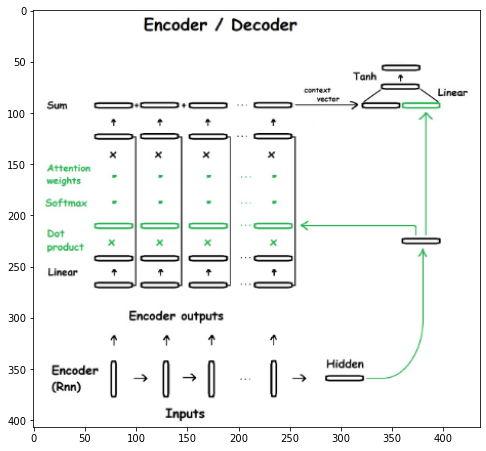

In [26]:
model_helper.show_me()

In [73]:
PATH = "../data/model_XAI"
model = model_helper.train_model(np.shape(X_train[0])[-1], X_train, Y_train, X_test, Y_test, False, config.BATCH_SIZE, config.NUM_EPOCHS, config.PRC_EPOCH, PATH, True)


the model  ../data/model_XAI has beed loaded !


- Test the performance


  0%|          | 0/7978 [00:00<?, ?it/s]

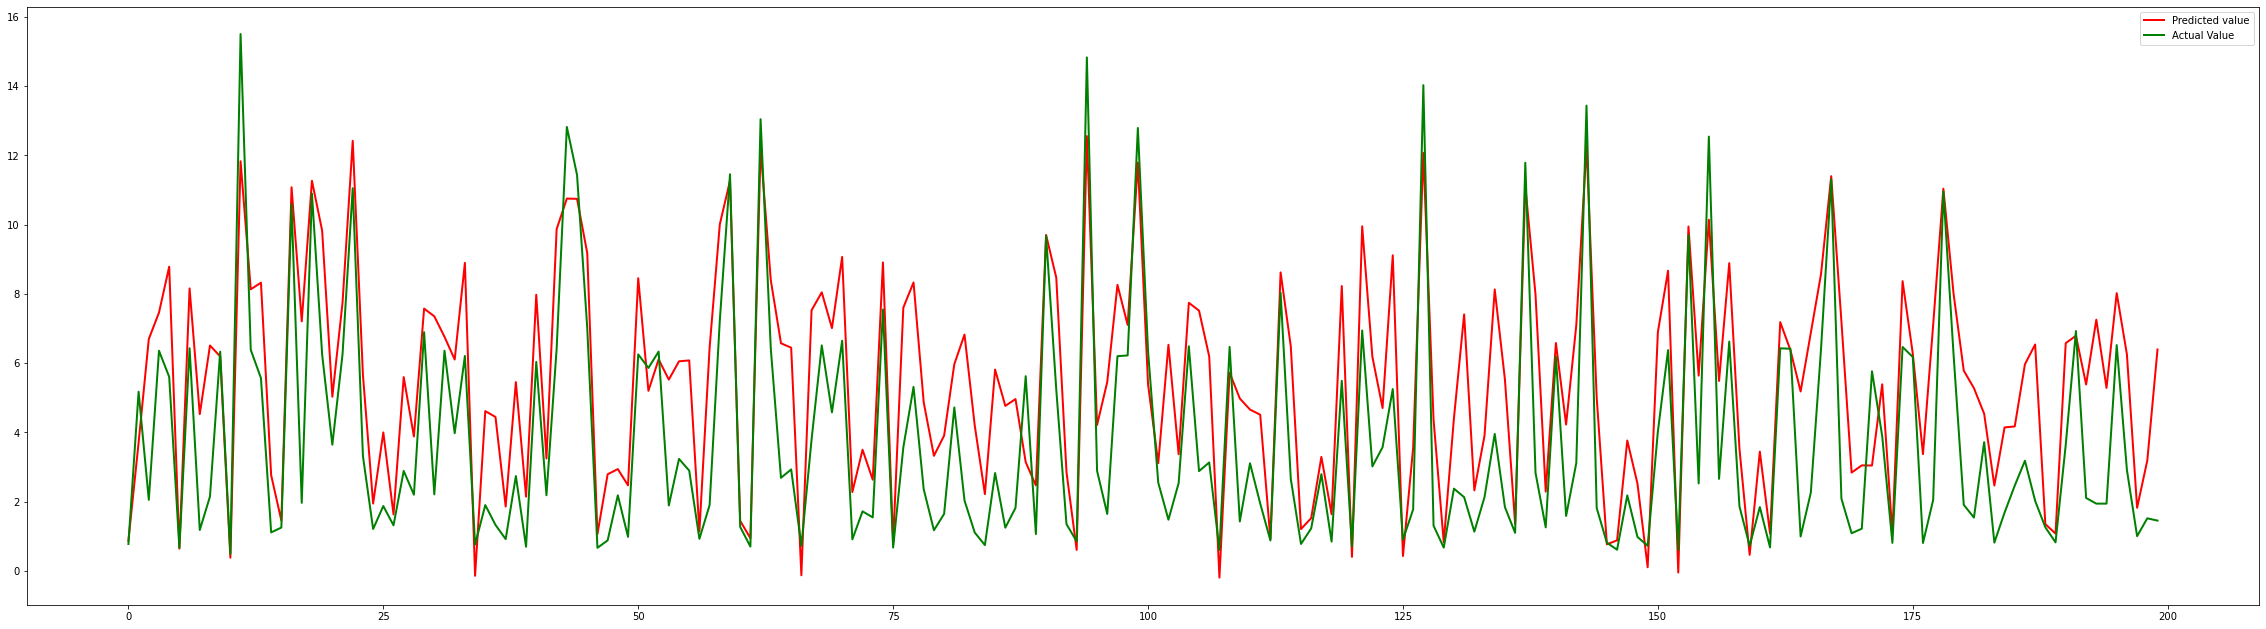

Rmse lsoss -> 3.215748989728739
Mean absolute error -> 2.1551826000213623
R2 score -> 41.0


In [88]:
base_model_actual_value, base_model_predicted_value, base_model_RSME_score, base_model_R2_score, base_model_MAE_score, _, _ = model_helper.display_results(model, X_test, Y_test, y_scaler, (-7, 13), (200, 400))
# print(actual), print(predicted)
# Comment about the result:: Capture variation but missing trend


- Generate the explaination (global)


  0%|          | 0/399 [00:00<?, ?it/s]

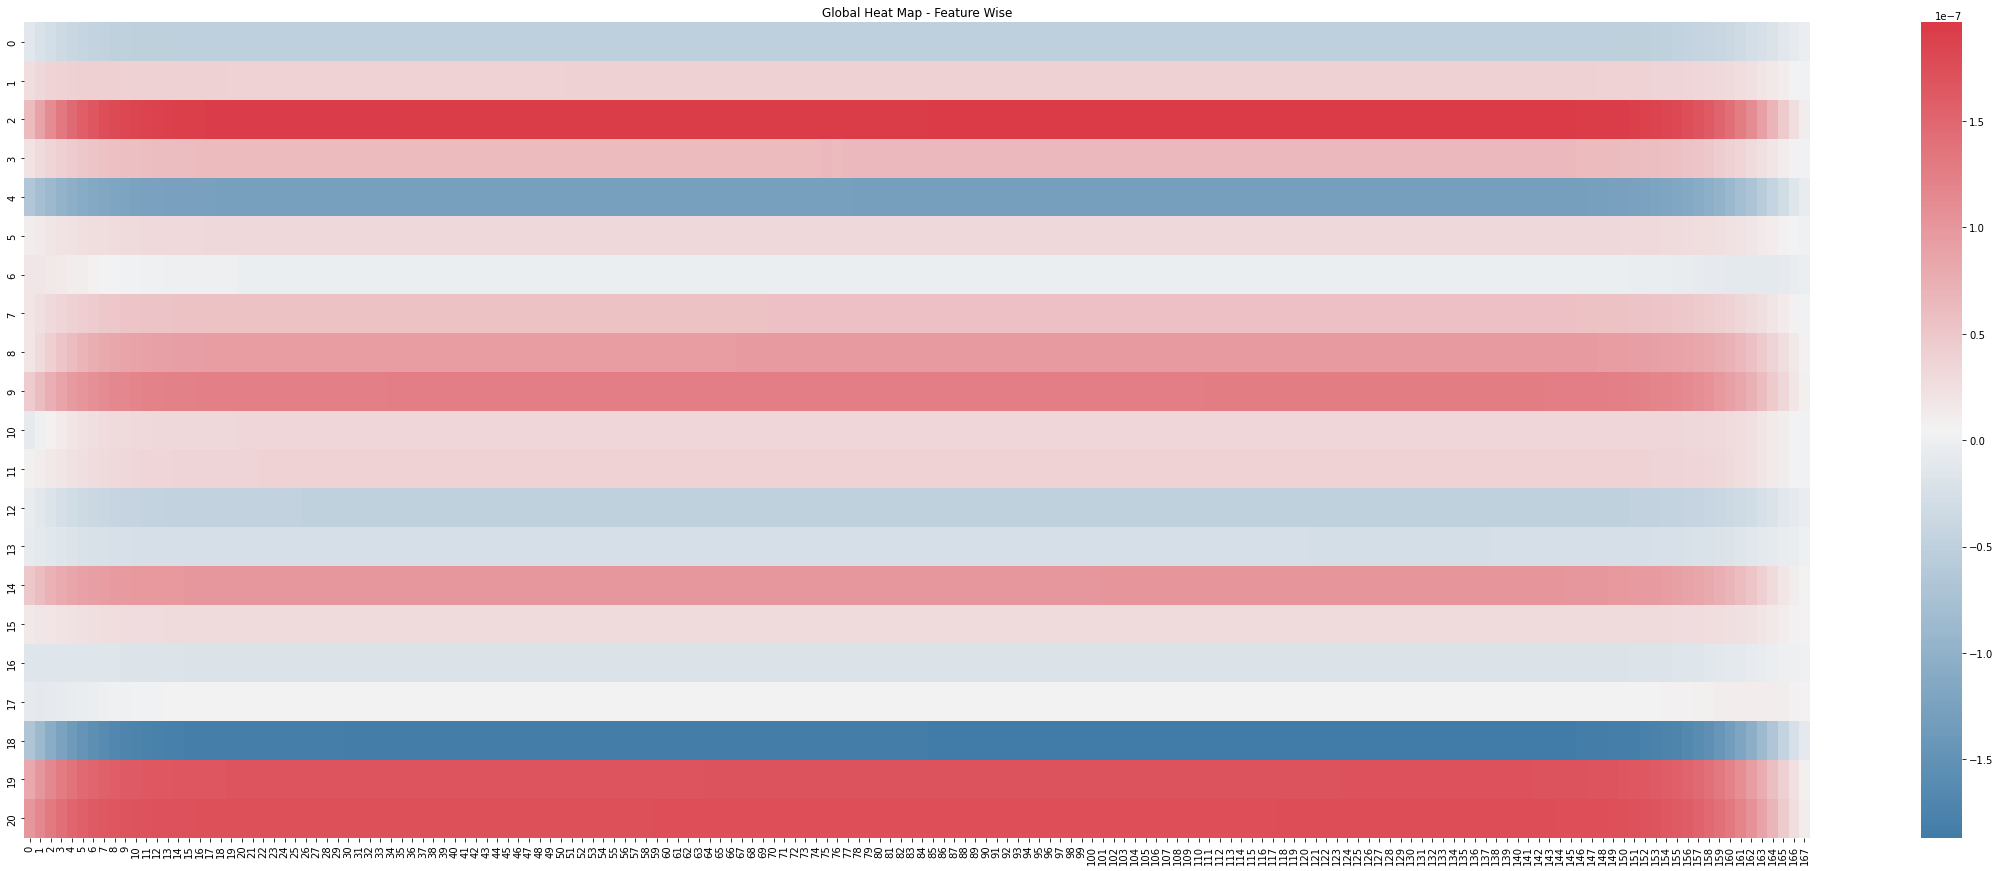

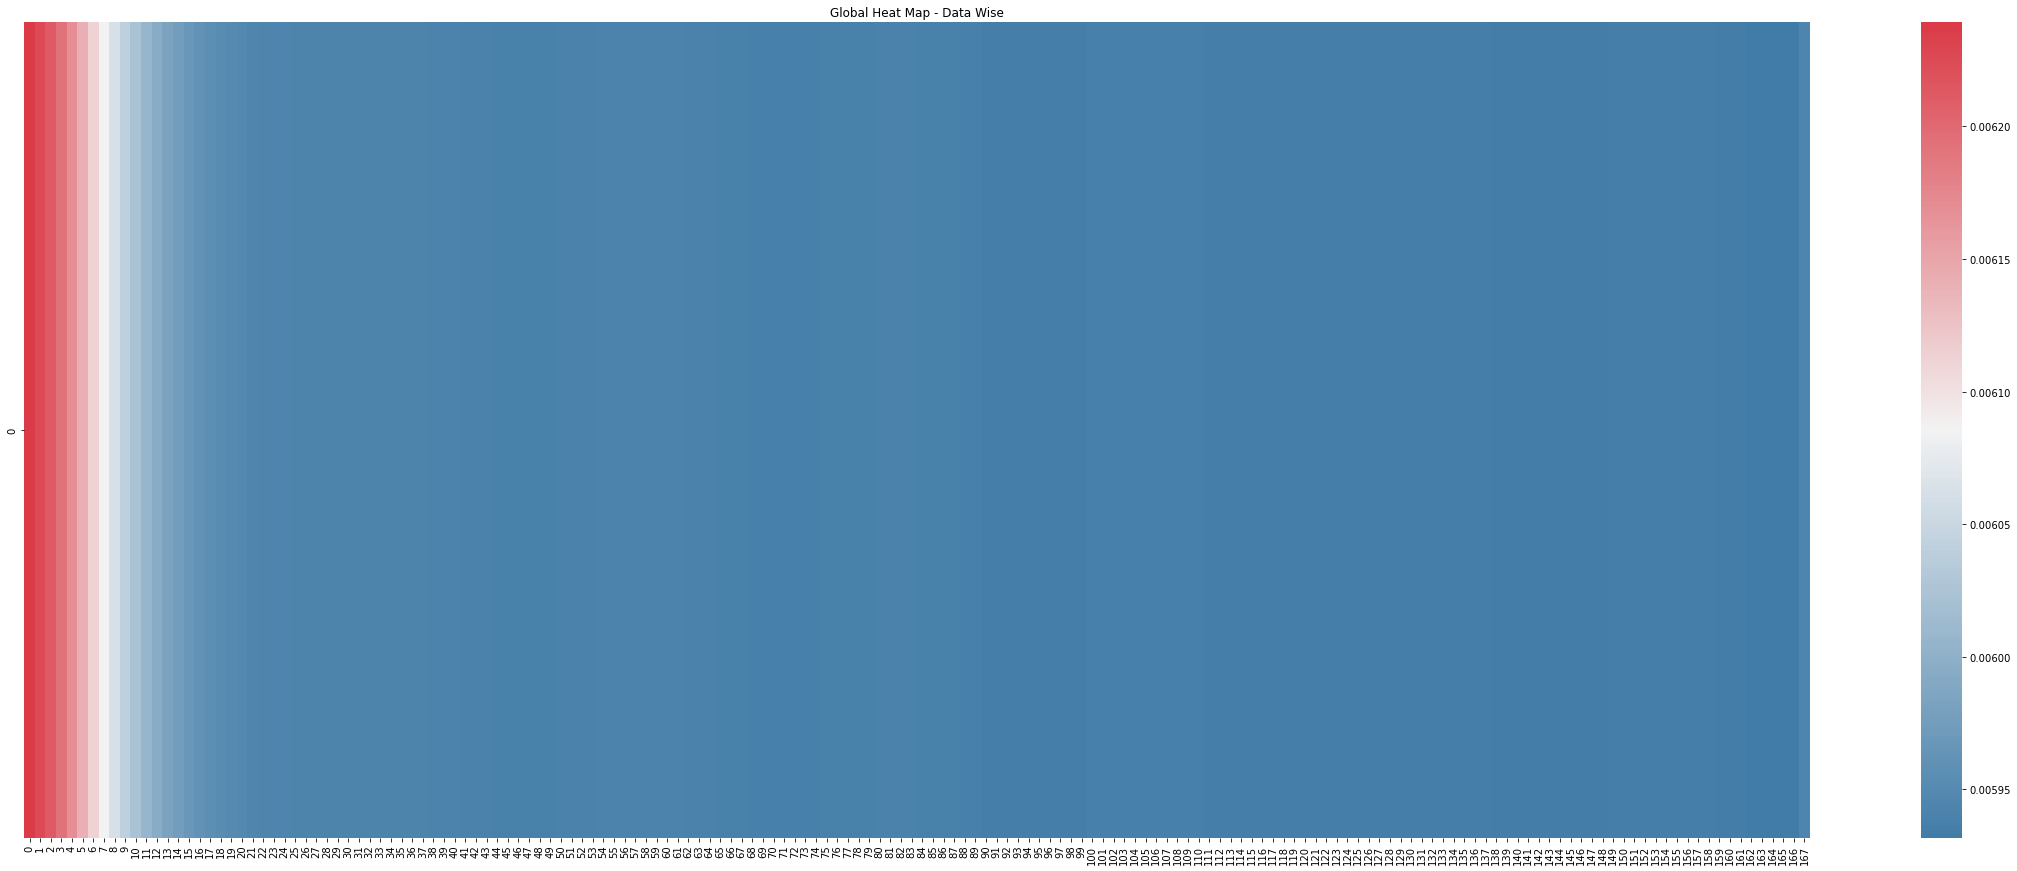

In [31]:
# compute global attention
meanAttn, meanScores = model_helper.generate_global_heatmap(model, X_test, "Global Heat Map")


- How's the heatmap looks like, for good and bad predictions


In [32]:
good_pred, bad_pred = model_helper.split_good_bad_data(X_train, Y_train, model, y_scaler)


  0%|          | 0/31910 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

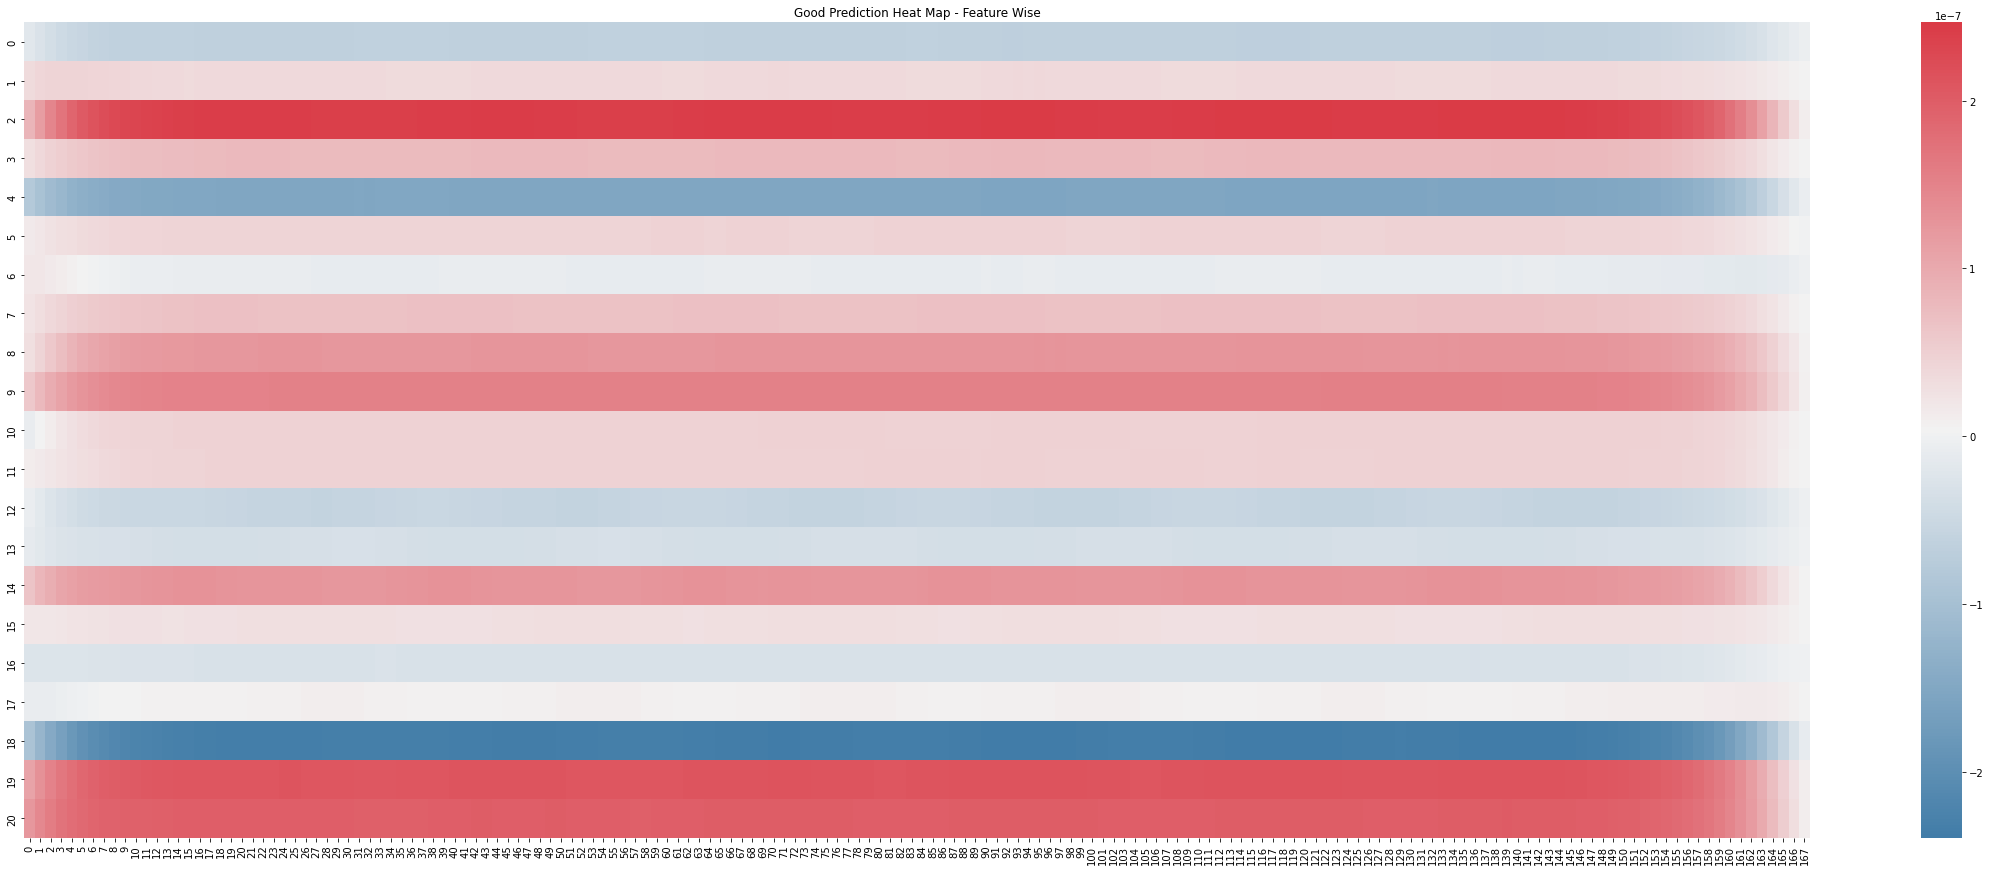

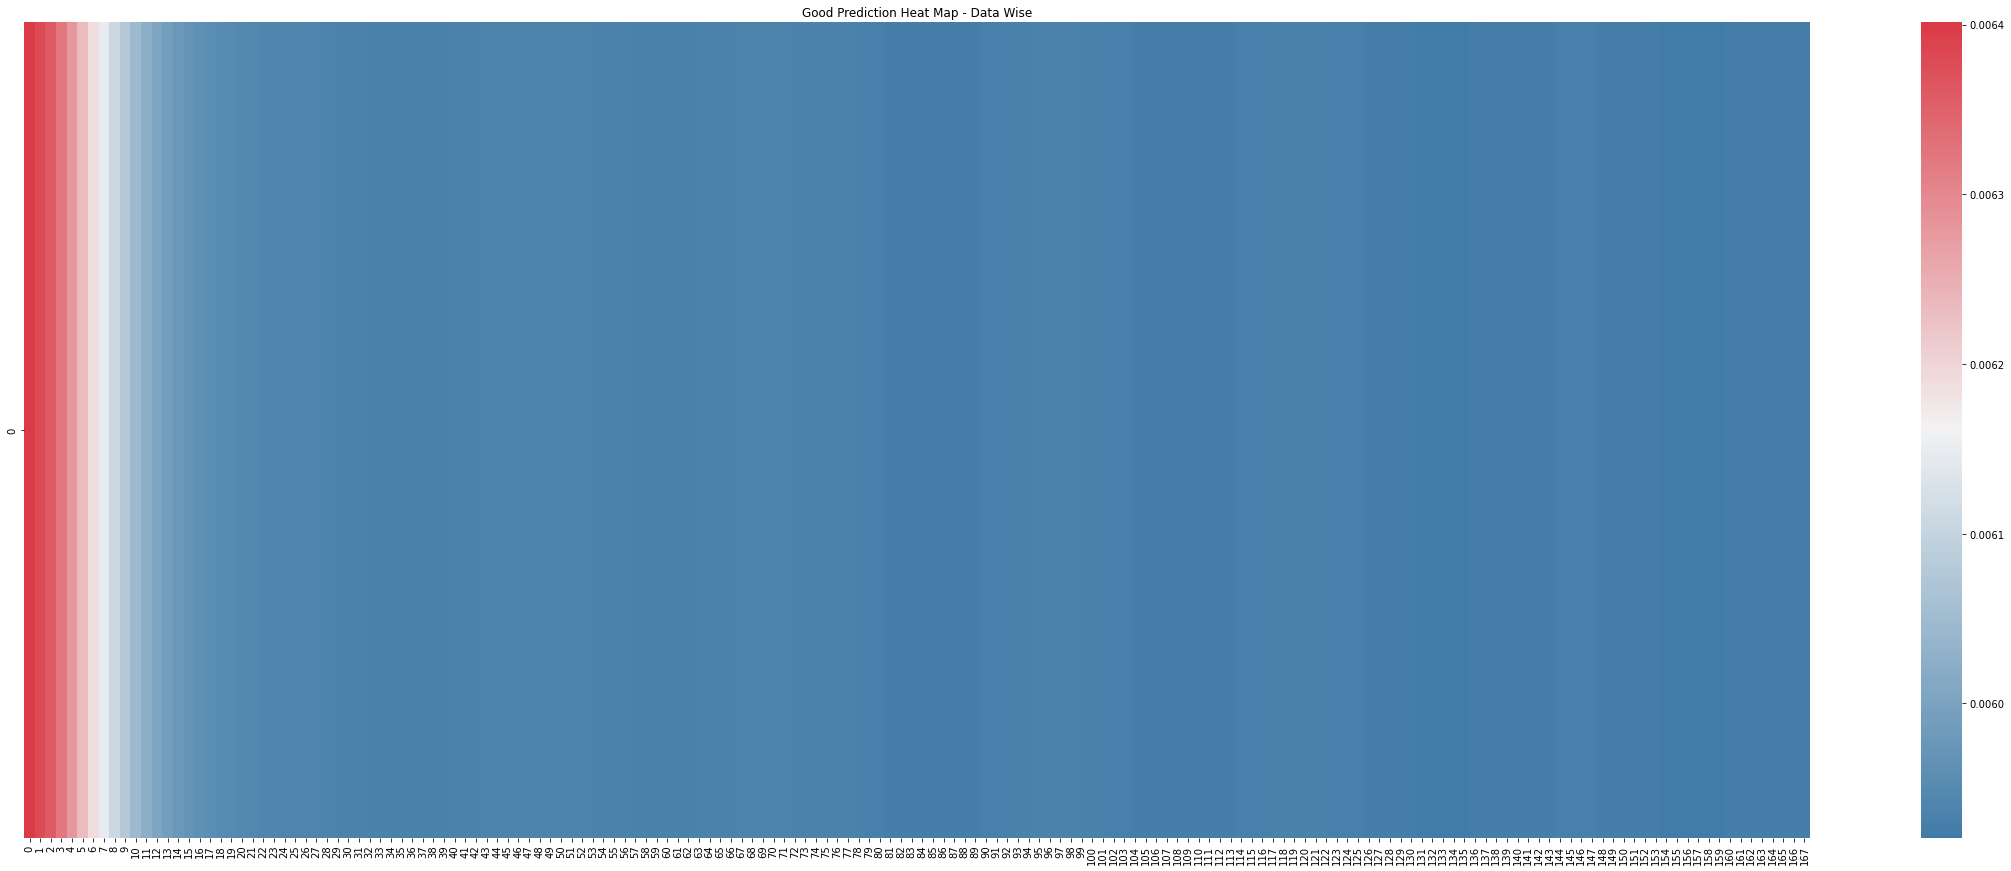

  0%|          | 0/1584 [00:00<?, ?it/s]

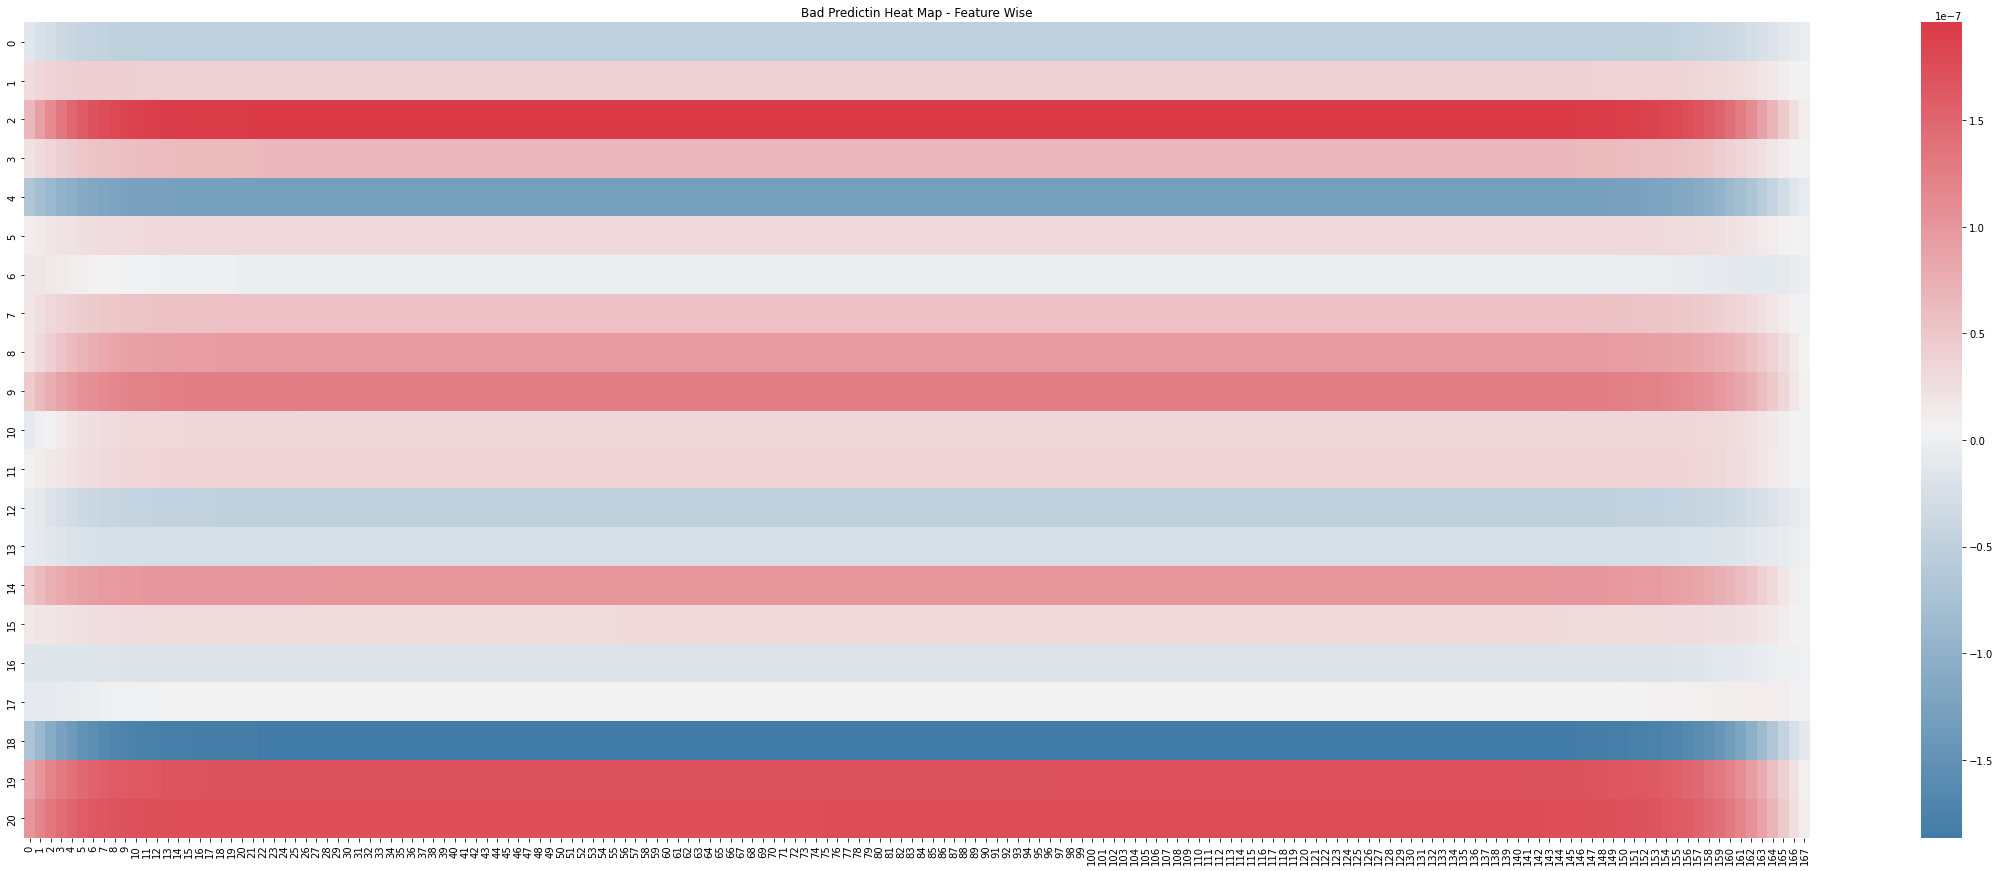

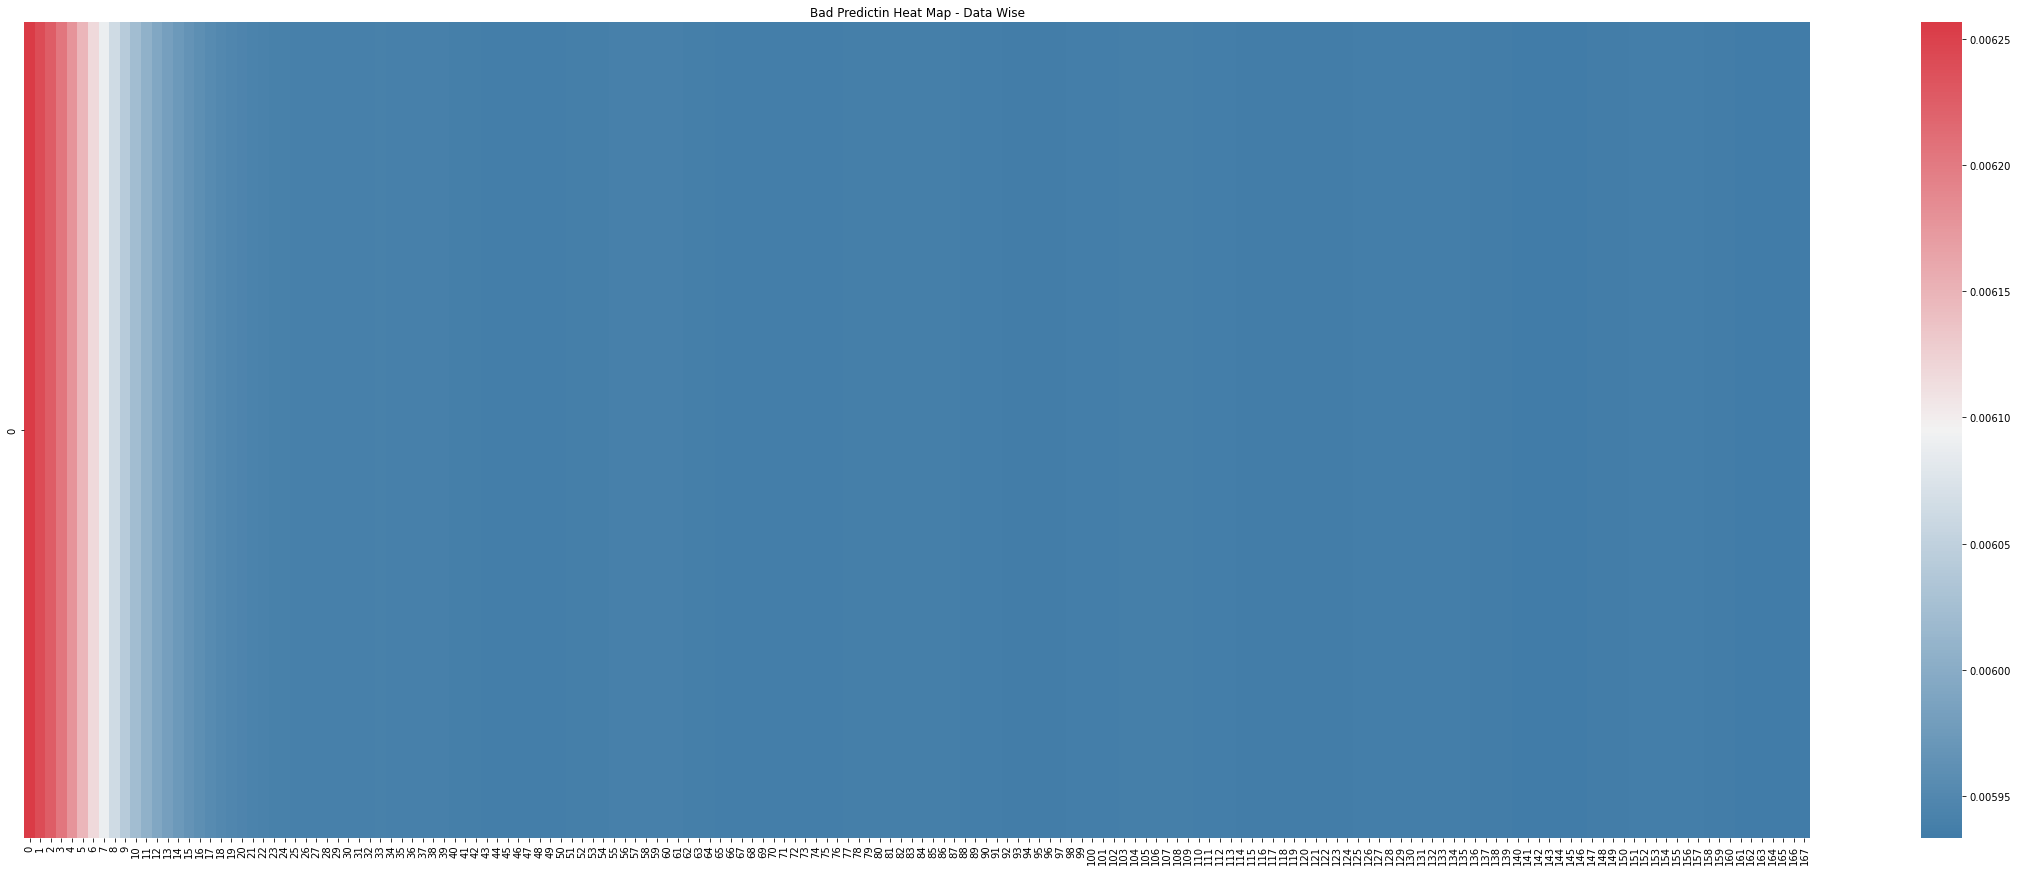

(array([[-1.38501095e-08,  2.78147425e-08,  6.43942926e-08, ...,
         -6.95957851e-08,  8.39195593e-08,  1.01252866e-07],
        [-2.11877360e-08,  3.33613492e-08,  8.99237236e-08, ...,
         -8.96162859e-08,  1.01538809e-07,  1.18009453e-07],
        [-2.84714794e-08,  3.72211844e-08,  1.13288010e-07, ...,
         -1.08420103e-07,  1.17044159e-07,  1.32378517e-07],
        ...,
        [-1.38222527e-08,  1.07930438e-08,  4.78713211e-08, ...,
         -4.52003484e-08,  4.08013143e-08,  4.74661093e-08],
        [-8.10423284e-09,  6.22911722e-09,  2.66435780e-08, ...,
         -2.51179131e-08,  2.28316797e-08,  2.71035852e-08],
        [-3.11093240e-09,  2.38644615e-09,  9.47090406e-09, ...,
         -8.88989060e-09,  8.27353031e-09,  9.95471261e-09]], dtype=float32),
 array([[0.00625649],
        [0.00624062],
        [0.00622591],
        [0.00620459],
        [0.00617743],
        [0.00614744],
        [0.00611737],
        [0.00608899],
        [0.00606344],
        [0.00604

In [33]:
model_helper.generate_global_heatmap(model, good_pred, "Good Prediction Heat Map")
model_helper.generate_global_heatmap(model, bad_pred, "Bad Predictin Heat Map")

- Generate the explaination (Local)


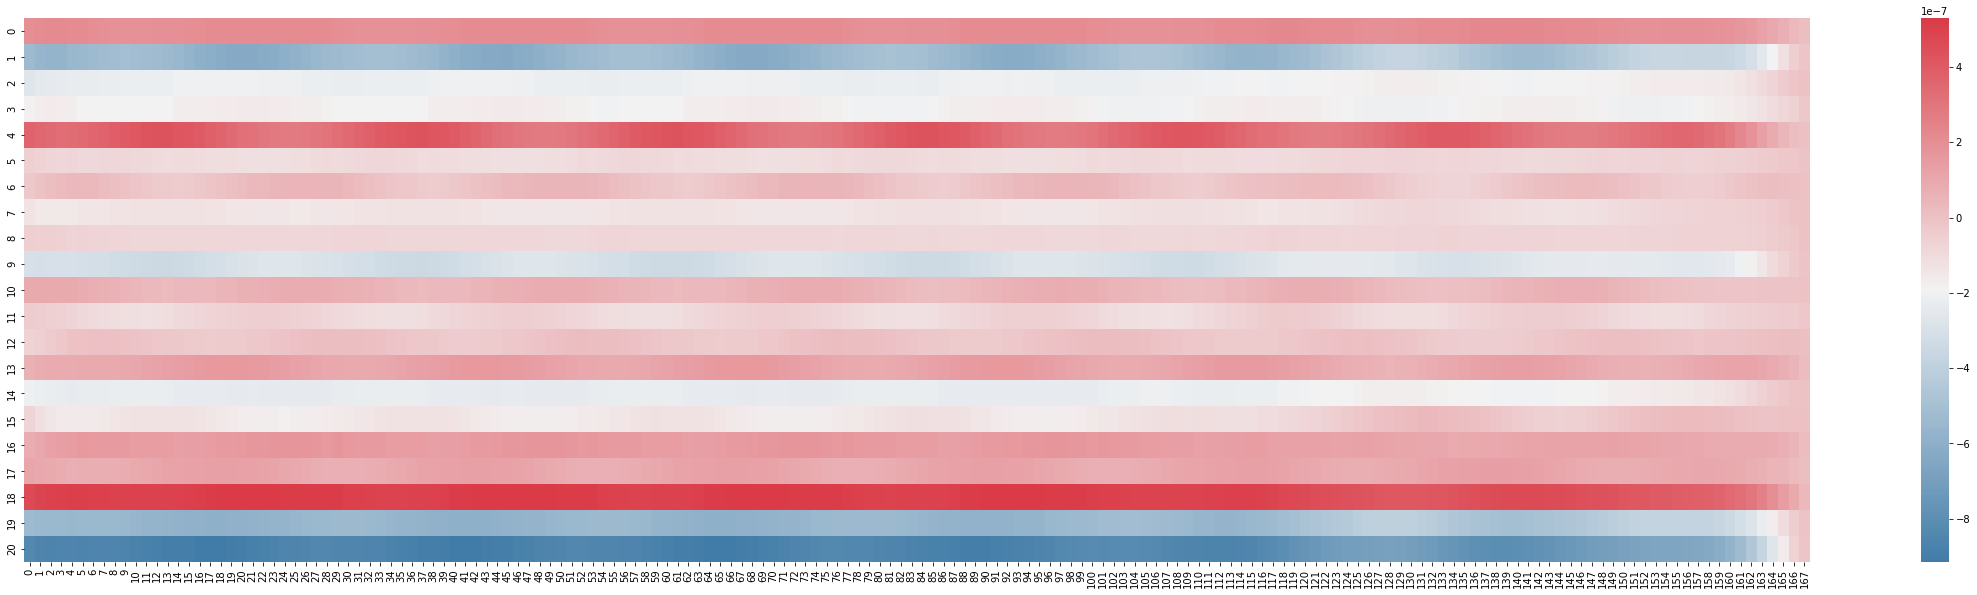

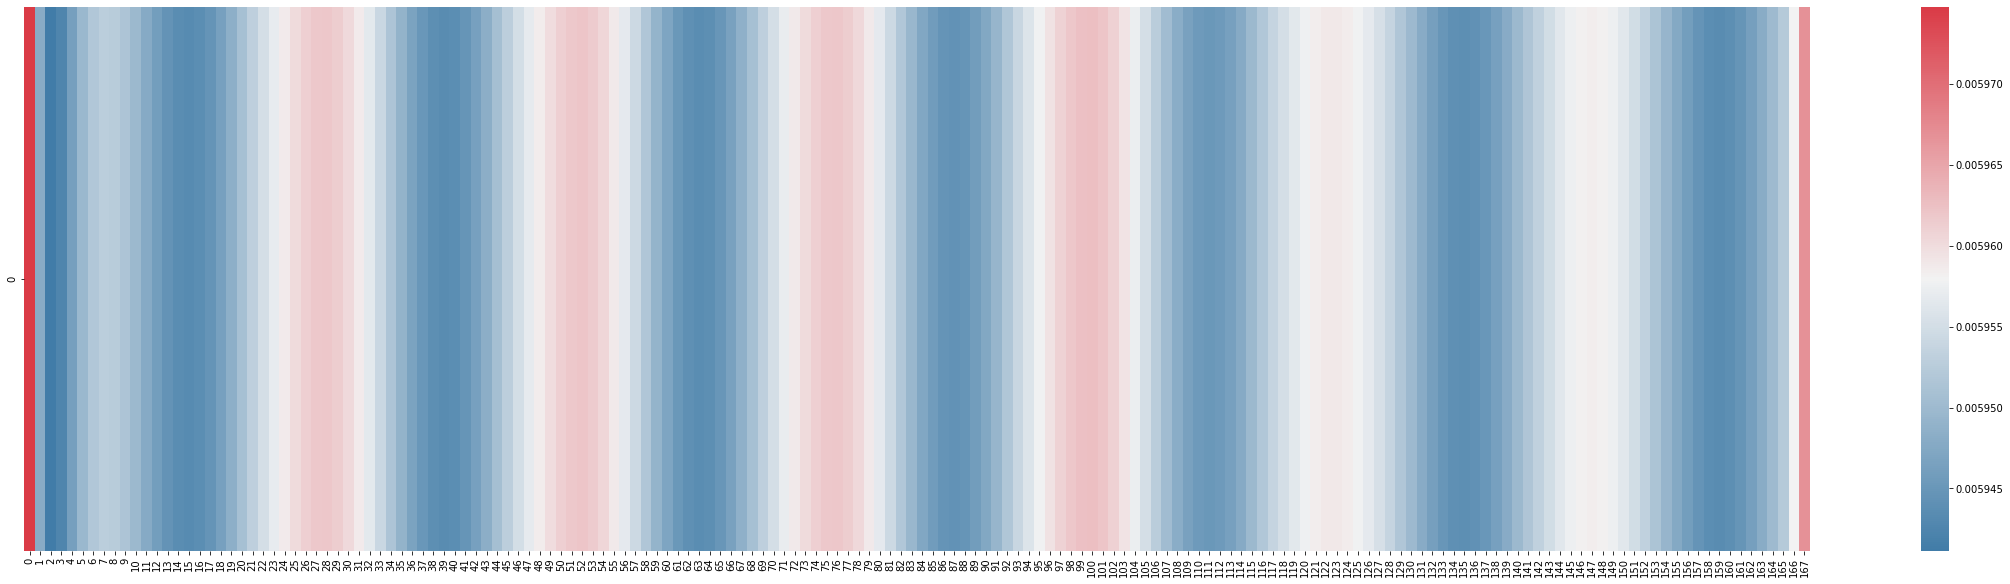

Actual result -> -0.7273925740471978 && Predicted result -> -0.5944974422454834
Error - 0.13289513180171442


In [62]:
heat_index = 2
res = model_helper.disp_grads_rk(model_helper.compute_grads(None, model, X_test[heat_index]))
print(f"Actual result -> {Y_test[heat_index]} && Predicted result -> {res}")
print(f"Error - {np.mean(np.abs(Y_test[heat_index] - res))}")

- Partial dependency plt, to manipulate the data


In [35]:
X, y = train_6.iloc[:, :-1], np.reshape(y_scaler.inverse_transform(np.reshape(train_6.iloc[:, -1].to_numpy(), (-1, 1))), (-1))


In [36]:
polyreg = model_helper.train_plyrg_model(4, X, y)

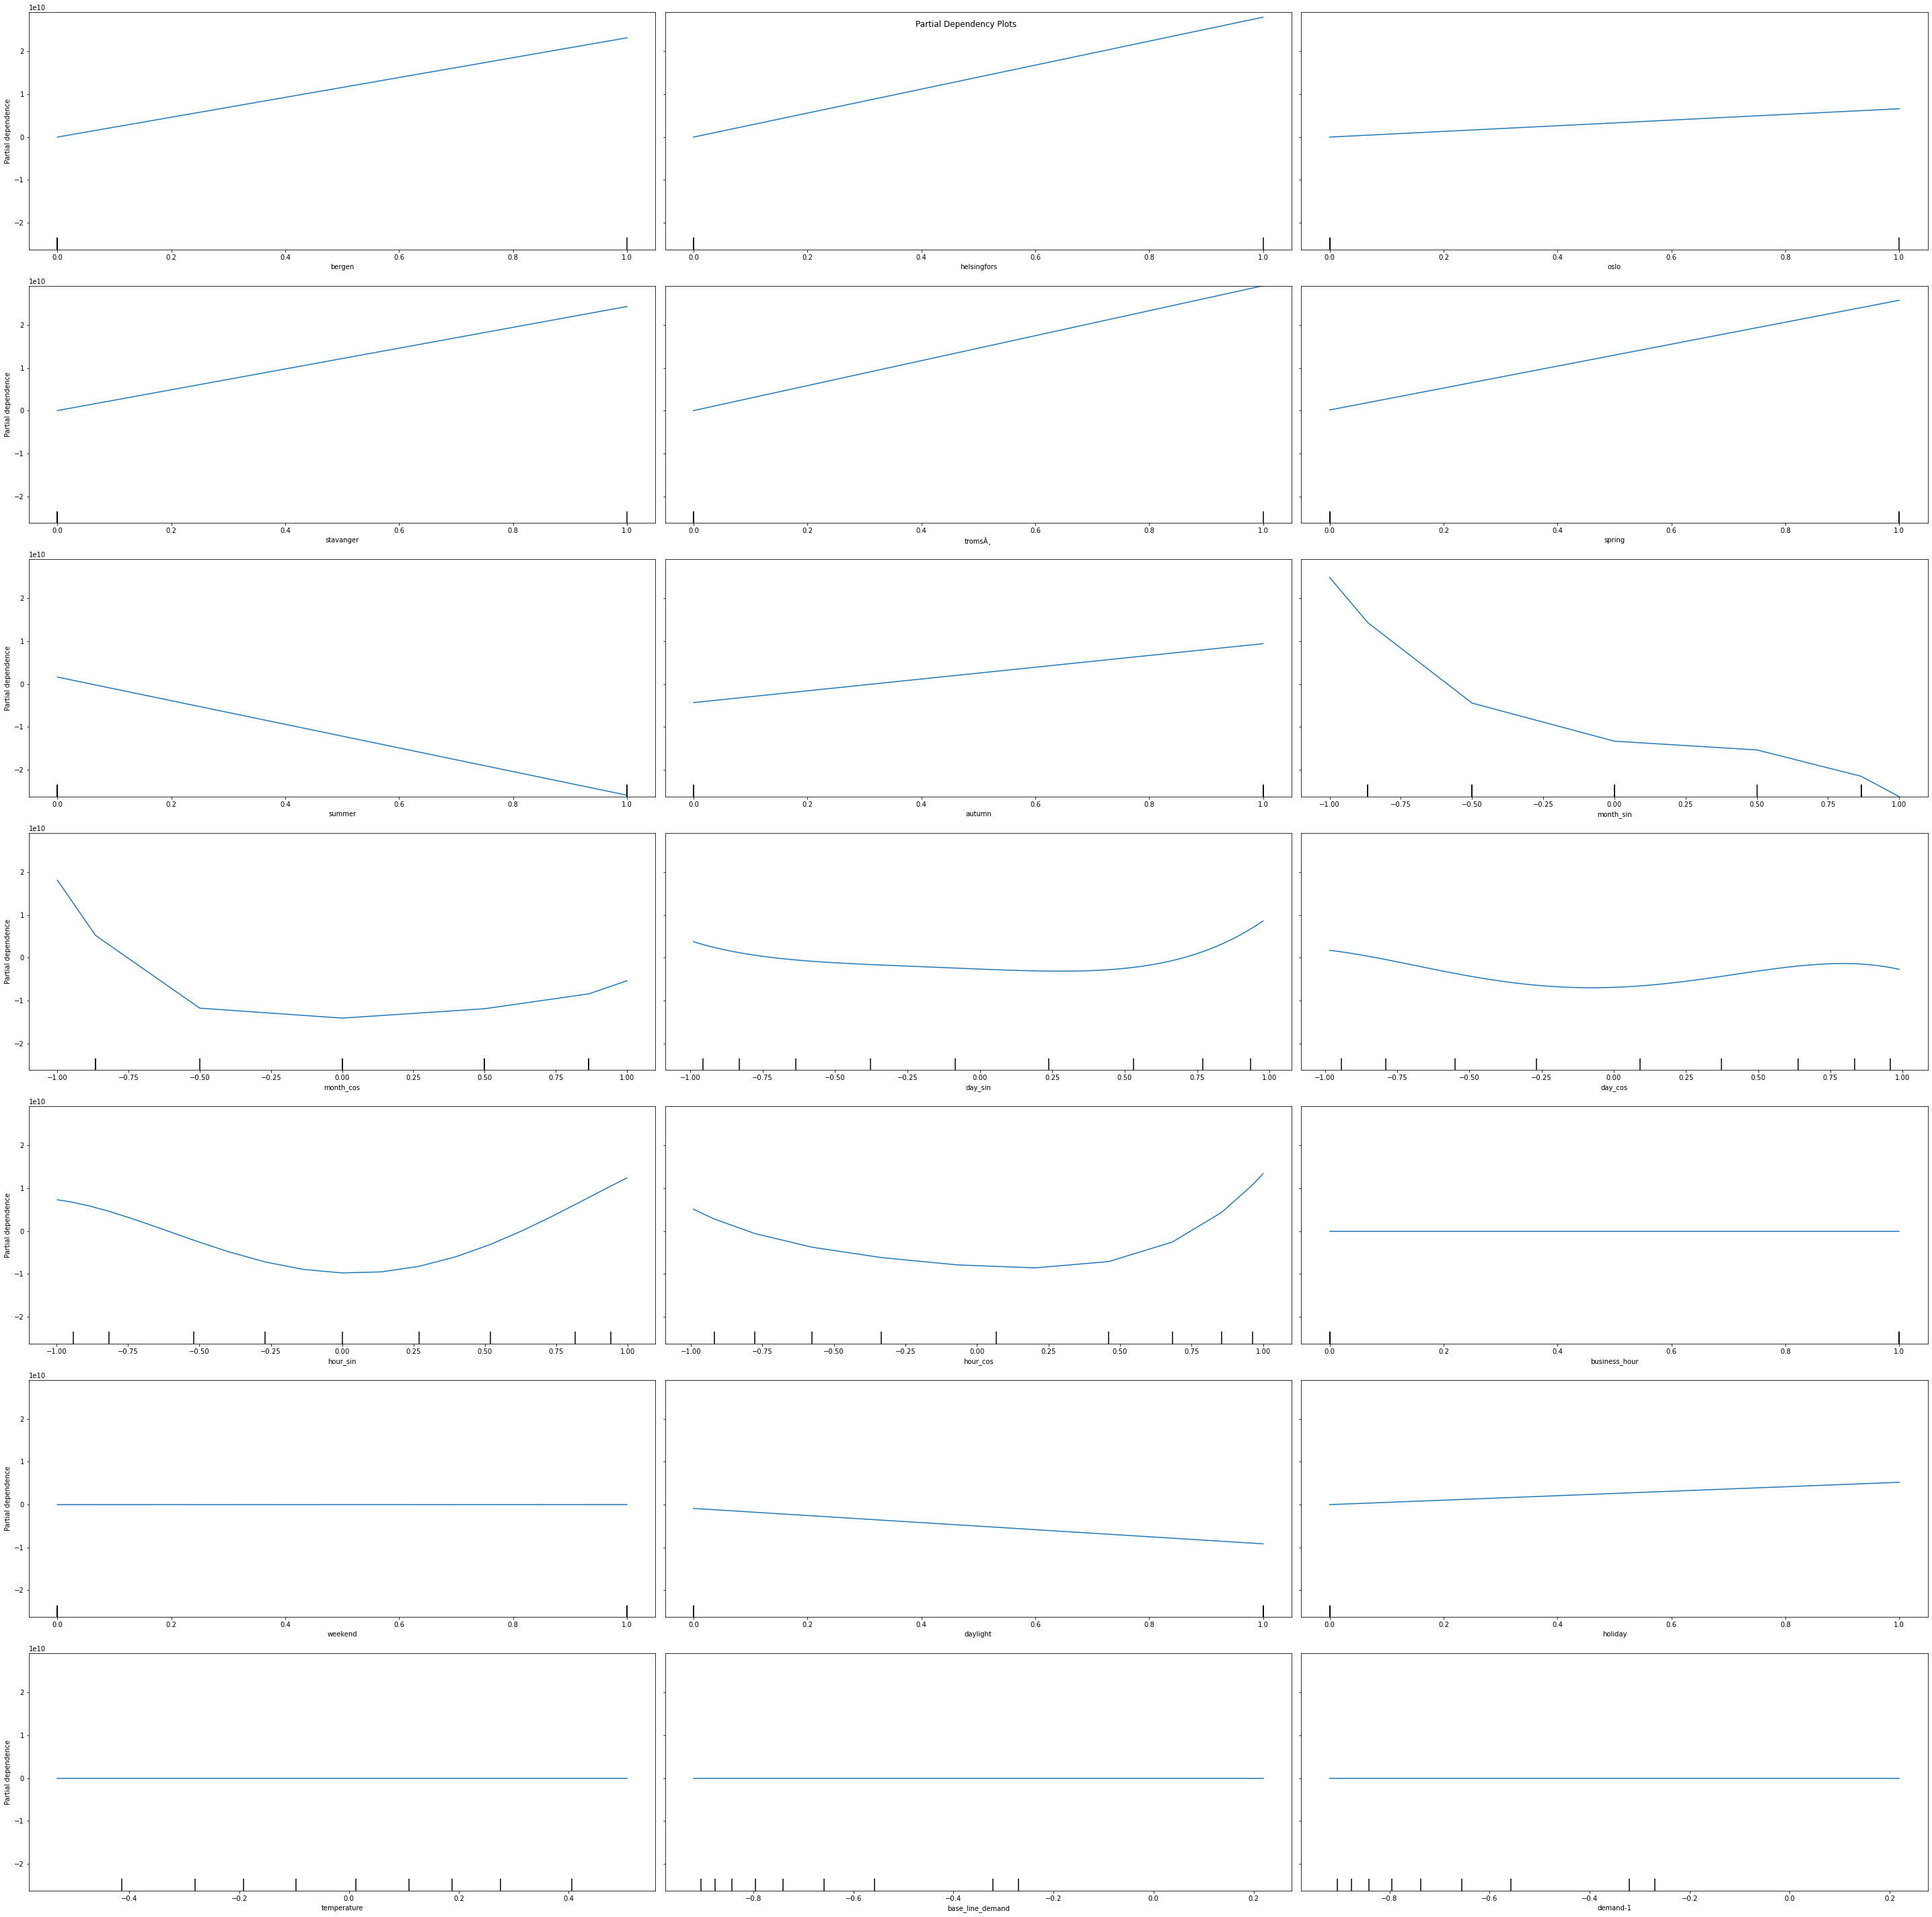

In [40]:
model_helper.generate_feature_graph(polyreg, X, 3, math.ceil(len(X.columns)/3), X.columns)

- Perturbation analysis or replace less important data with random noise, K-nearest neighbor, Augmented data


- Random noise


In [63]:
# Add random noise based on the heatmap
light_blue = (0.005950, 0.005959)
dark_red = (0.005967, )
X_train_with_noise = data_helper.add_random_noise(X_train, light_blue, dark_red, model)


In [72]:
# Retrain the model with the new data
PATH_NOISE = "../data/model_XAI_Noise"
model_noise = model_helper.train_model(np.shape(X_train[0])[-1], X_train_with_noise, Y_train, X_test, Y_test, False, config.BATCH_SIZE, 6, config.PRC_EPOCH, PATH_NOISE, True)


the model  ../data/model_XAI_Noise has beed loaded !


  0%|          | 0/7978 [00:00<?, ?it/s]

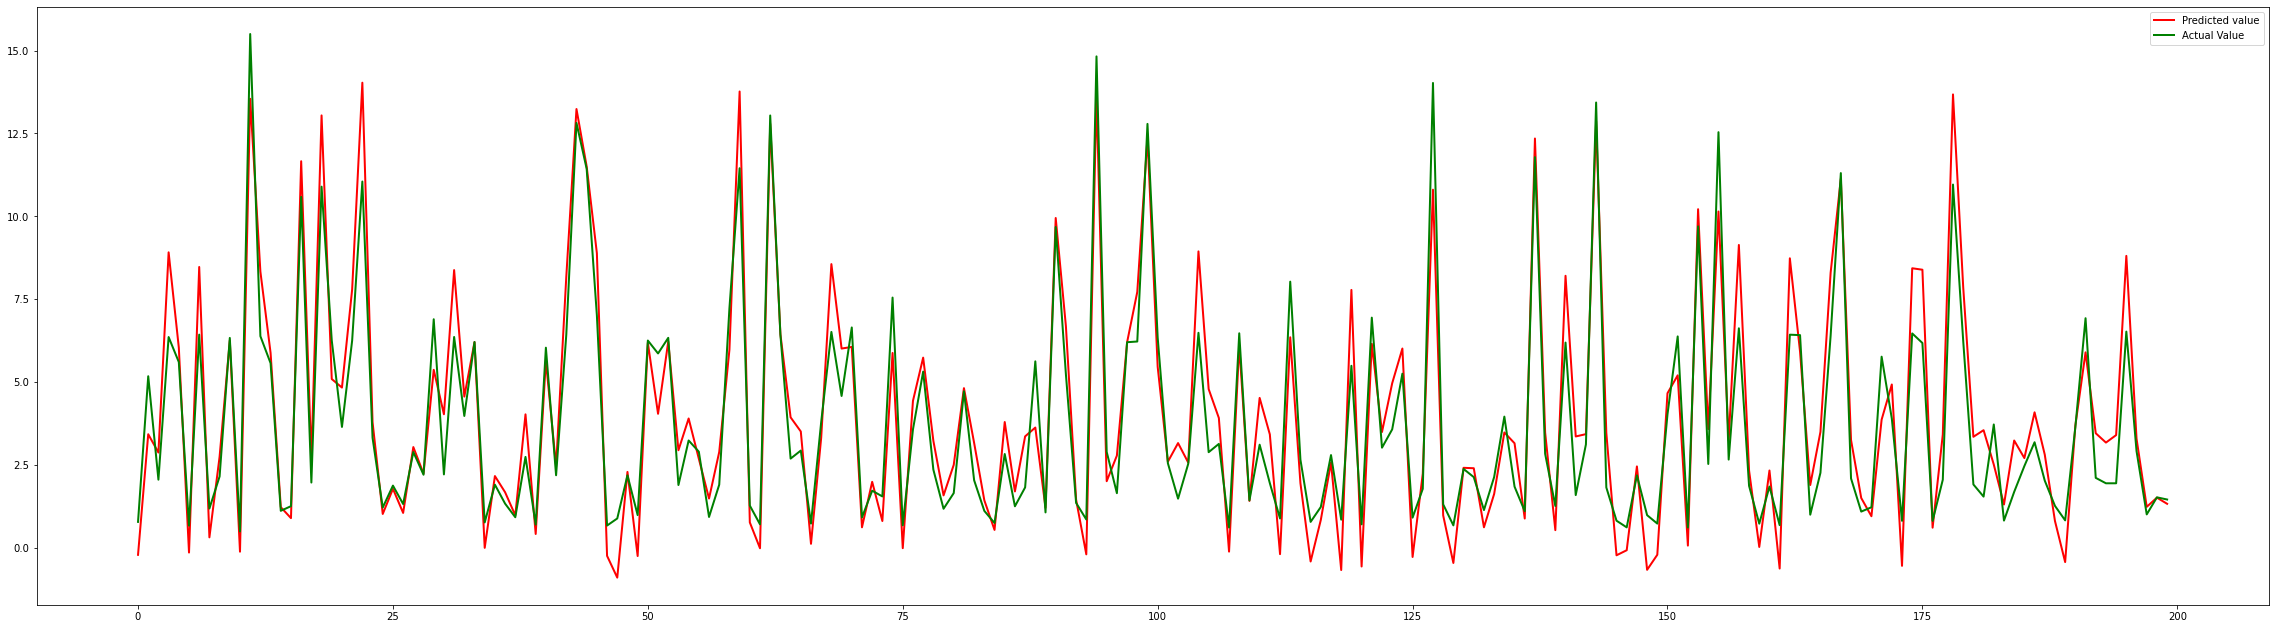

Rmse lsoss -> 3.284955793109415
Mean absolute error -> 0.9742061495780945
R2 score -> 85.0
[6.495, 6.572, 2.459602, 0.9975492, 2.002457, 0.66069573, 1.0118951, 11.639528, 2.0394406, 0.8659412, 1.5754752, 2.9876559, 1.9841491, 0.9782992, 5.357773, 1.3884552, 12.293766, 0.7559242, 4.7755647, 2.046958, 2.0966852, 4.978143, 1.425964, 5.443959, 1.716753, 4.413298, 0.9365382, 5.797216, 6.41, 0.8254521, 1.1350372, 6.1619997, 16.058035, 1.539959, 1.3258712, 0.78824824, 0.81990325, 1.9559698, 5.675, 0.8436431, 1.4959232, 6.378, 6.127, 6.491, 4.143895, 5.90778, 4.964375, 1.0691087, 0.7204838, 6.2739997, 1.079751, 1.8014932, 0.6359981, 2.9813137, 1.0964572, 3.204219, 1.7833339, 1.3659022, 1.8872201, 0.9610627, 3.1313682, 6.9197173, 1.133106, 1.0843328, 1.6489929, 1.5545421, 2.852304, 6.415, 2.1970112, 1.690776, 1.3388044, 1.4278382, 0.9464872, 10.057968, 2.019902, 2.5084667, 1.658097, 6.599, 3.3152804, 3.2868161, 5.6559258, 6.1280003, 10.94216, 6.644306, 4.579412, 1.1207048, 10.489546, 0.80653286

(None, None)

In [86]:
# Check the performance
noise_model_actual_value, noise_model_predicted_value, noise_model_RSME_score, noise_model_R2_score, noise_model_MAE_score, _, _ = model_helper.display_results(model_noise, X_test, Y_test, y_scaler, (-1, 17), [200, 400])
print(noise_model_actual_value), print(noise_model_predicted_value)

## Analysis from the PDP -
    -> OSLO is the only city that consume a tons of electricy compare to the other ctities
    -> All the other cities might have a normal electricity demand
    -> It, would be a good experiment, to see, if the deduct Bergen data from the training data set, it might overall improve the model performance
    -> From the month graph - it seems like, at the end of the year (11, 12), consumption really spikes
    -> From the day graph - it seems like, on the day (3,4) the consumption spikes
    -> From the daylight graph - it seems like, if the daylight increase, consumption decrease
    -> From the holiday graph - it seems like, during the hoiliday consumption increase
    -> And, all the other feature, doesnt have that much deviative impact


- Remove OSL data and see if that improves the perfomance
- As the the trend of OSLO data - is bit different compare to others


In [49]:
# Last training data set
train_n_oslo = train_6.copy()


In [50]:
train_n_oslo = train_n_oslo[~(train_n_oslo['oslo'] == 1)]


In [51]:
train_n_oslo_split_X, train_n_oslo_split_Y = data_helper.split_sequences_global(train_n_oslo, config.WINDOW_SIZE, list(train['place'].unique().tolist()[:-1]))
X_train_n_oslo, X_test_n_oslo, Y_train_n_oslo, Y_test_n_oslo = train_test_split(train_n_oslo_split_X, train_n_oslo_split_Y, test_size=0.2, random_state=0)


In [74]:
# Retrain the model with the new data
PATH_N_OSLO = "../data/model_XAI_n_oslo"
model_n_oslo = model_helper.train_model(np.shape(X_train[0])[-1], X_train_n_oslo, Y_train_n_oslo, X_test_n_oslo, Y_test_n_oslo, False, config.BATCH_SIZE, 5, config.PRC_EPOCH, PATH_N_OSLO, True)


the model  ../data/model_XAI_n_oslo has beed loaded !


  0%|          | 0/6288 [00:00<?, ?it/s]

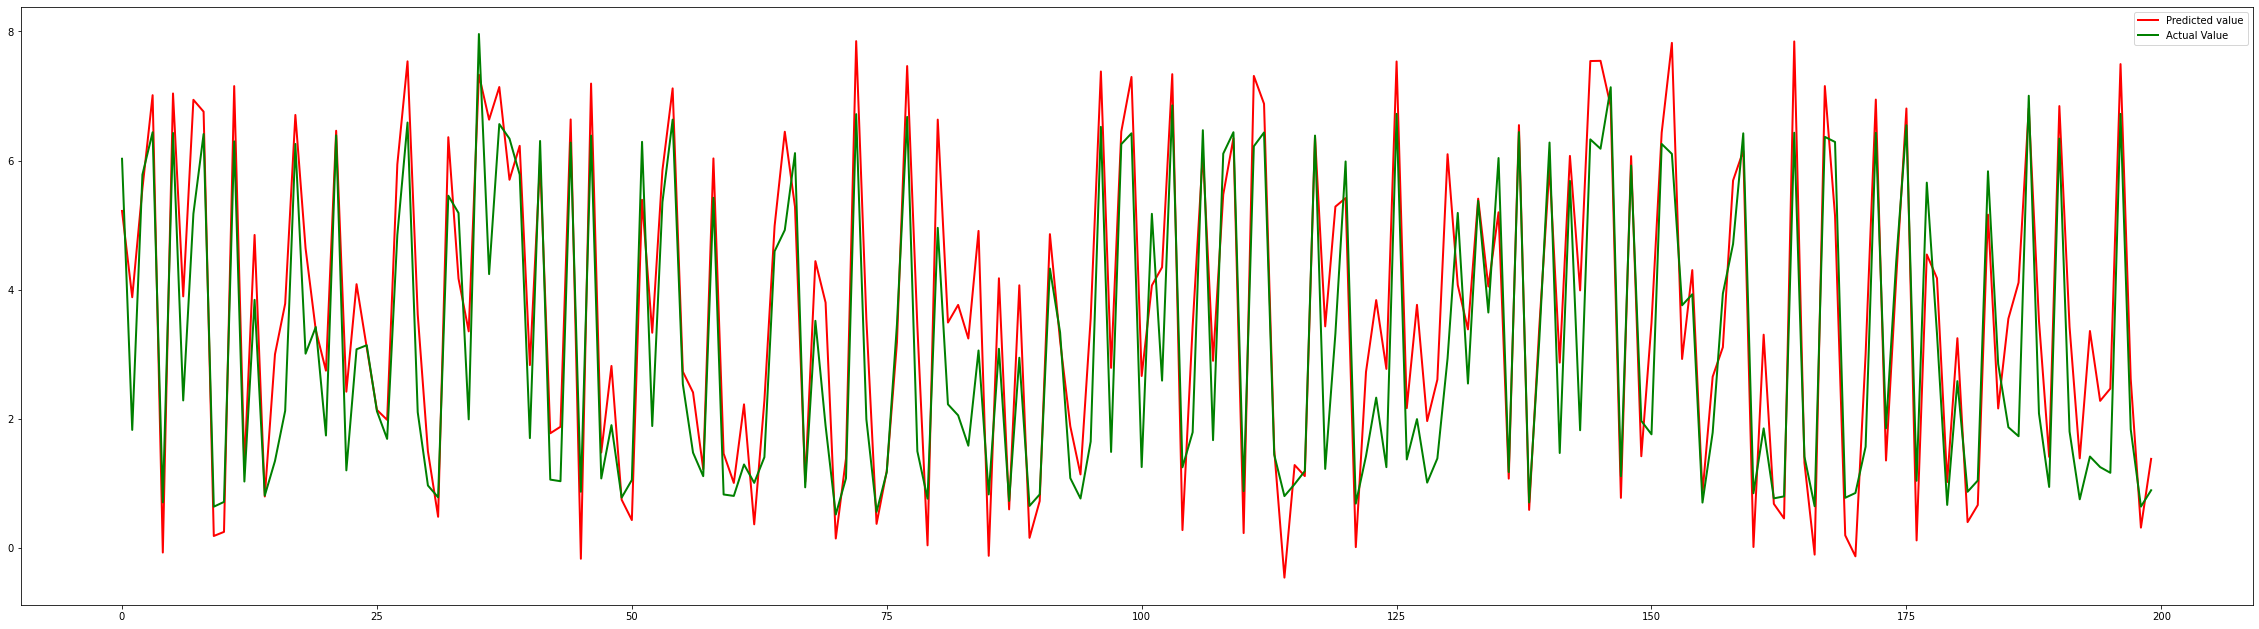

Rmse lsoss -> 2.126104740874998
Mean absolute error -> 0.8307965397834778
R2 score -> 78.0
[0.52868396, 5.8114448, 5.7732925, 1.399105, 6.229, 3.0692267, 0.5862622, 6.3540006, 1.4146318, 0.80516315, 0.68467176, 7.3629174, 1.076884, 6.44, 1.6390369, 6.463, 0.6899151, 2.162003, 1.712397, 0.7656619, 0.58119524, 2.12848, 6.293, 2.725976, 6.4940004, 5.8614607, 1.9685571, 2.492826, 2.361836, 6.2767067, 6.3869996, 2.5229998, 1.6463201, 2.1864142, 6.401526, 0.79362607, 1.2080112, 1.1272539, 1.4749851, 3.8809848, 6.353, 7.429407, 3.0379202, 6.434, 0.75426626, 2.5728636, 6.388, 1.0418378, 1.768491, 1.3760141, 6.283, 1.9619182, 1.807027, 5.235, 1.0533222, 0.9526808, 0.962888, 0.7255589, 6.356, 1.0947702, 6.3202577, 1.044417, 7.2999997, 0.6790992, 0.70009375, 4.912, 2.0748742, 0.6518368, 6.3580003, 0.5499608, 5.6780005, 1.1179072, 4.989488, 1.2171729, 6.4649997, 3.795538, 5.780163, 6.5069995, 6.6629996, 0.61076903, 5.234, 2.1675053, 6.4820004, 0.9541108, 5.716945, 3.3620203, 6.619, 6.442, 6.46, 3.

(None, None)

In [97]:
# Check the performance
no_oslo_model_actual_value, no_oslo_model_predicted_value, no_oslo_model_RSME_score, no_oslo_model_R2_score, no_oslo_model_MAE_score, _, _ = model_helper.display_results(model_n_oslo, X_test_n_oslo, Y_test_n_oslo, y_scaler, (-4, 8), (200, 400))
print(no_oslo_actual_value), print(no_oslo_predicted_value)


## The whole hypothesis, is based on our specific model perforrmance, we we can call it model(technique) dependent
    -> As we can see from the model performace that, its under performing for some prediction, that is preety low compare to the average demand

- Try to adjust the training data with all the others finding and see if that improves the performance
- The hypothesis is that, from the prediction graph, we can see that, mostly our model is not performing well when the consumption is going down
- For all the spikes, the model is performing well, to solve the problem we could use different hypothesis, we could add some penalize terms to the model for lower consumption mitchmatch
- Or we could modify some traing data and convert some somple to more lower degree and see how the model perform, Or add some bias(lower consumption example) to the trainign data and see how the model perform.


# Lets try the data modification


In [57]:
train_low_demand = train_6.copy()

In [58]:
train_low_demand_split_X, train_low_demand_split_Y = data_helper.split_sequences(train_low_demand, config.WINDOW_SIZE)
X_train_low_demand, X_test_low_demand, Y_train_low_demand, Y_test_low_demand = train_test_split(train_low_demand_split_X, train_low_demand_split_Y, test_size=0.2, random_state=0)

In [75]:
# Retrain the model with the new data
PATH_LOW_DEMAND = "../data/model_XAI_low_demand"
model_low_demand = model_helper.train_model(np.shape(X_train[0])[-1], X_train_low_demand, Y_train_low_demand, X_test_low_demand,
                               Y_test_low_demand, False, config.BATCH_SIZE, 10, config.PRC_EPOCH, PATH_LOW_DEMAND, True)


the model  ../data/model_XAI_low_demand has beed loaded !


  0%|          | 0/9836 [00:00<?, ?it/s]

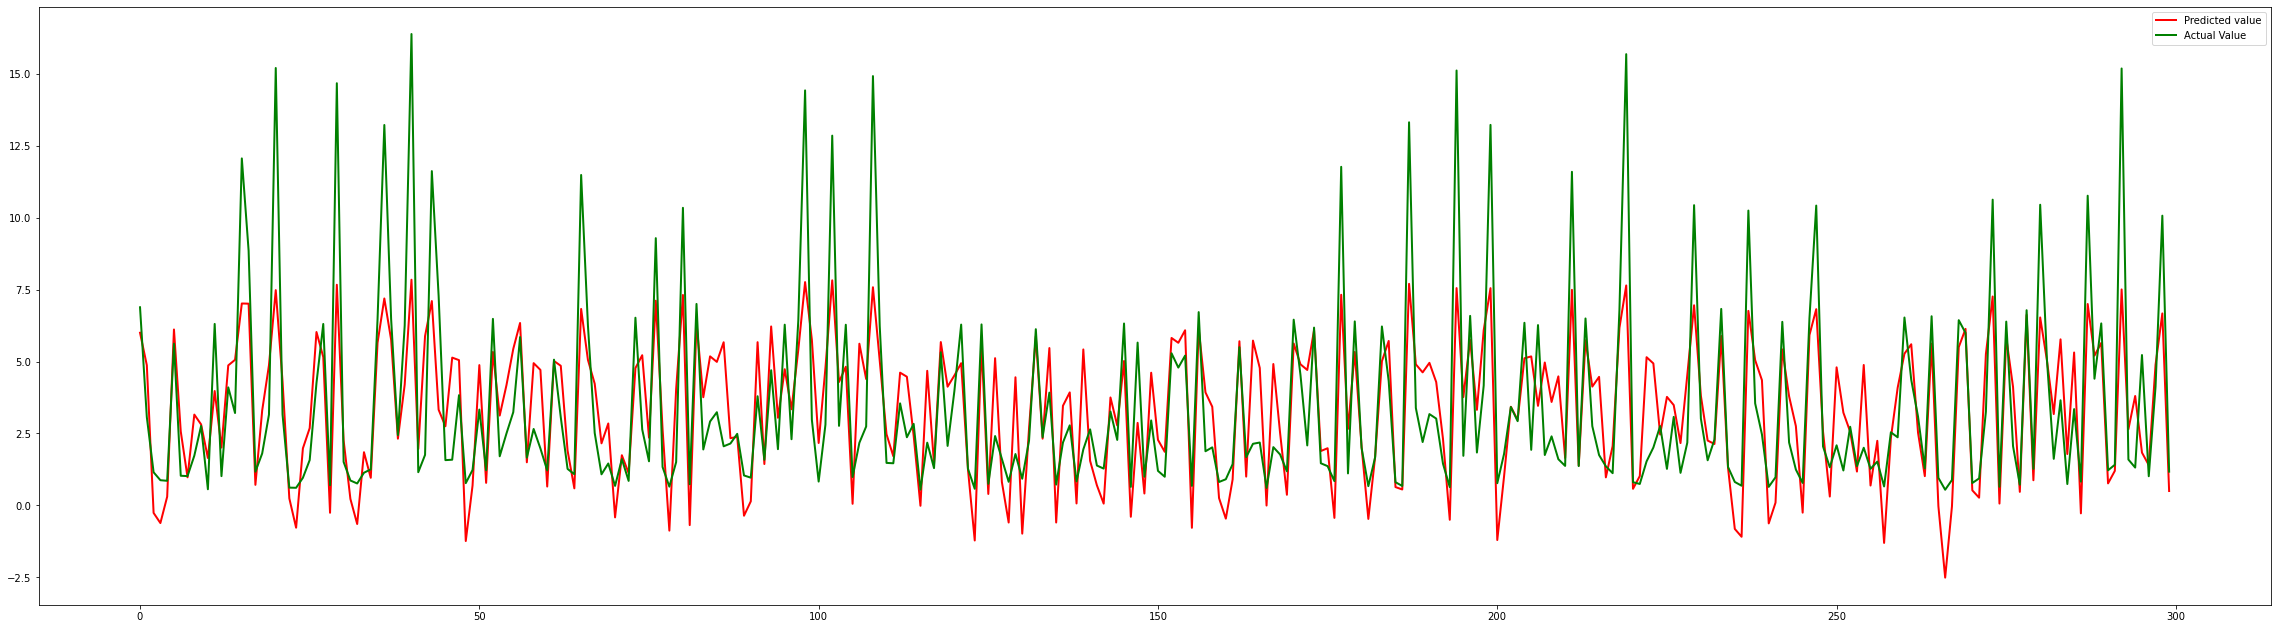

Rmse lsoss -> 3.046624119528991
Mean absolute error -> 1.573732614517212
R2 score -> 55.00000000000001
[16.471178, 5.427822, 1.6831309, 1.0092642, 0.83810073, 1.6089292, 2.8543231, 0.8650448, 13.1490755, 1.149332, 0.714594, 0.9058281, 2.8515575, 3.4296029, 1.0093707, 3.676945, 7.702912, 2.3858037, 17.051132, 1.6467826, 1.1130682, 1.1501102, 14.850148, 6.686675, 0.95446897, 4.288265, 5.7587013, 5.093, 1.2173649, 6.169889, 4.049833, 4.7865047, 0.5916202, 1.1212549, 0.62142414, 3.0397186, 0.5732958, 5.409027, 1.5176878, 1.0780908, 6.146237, 6.4259996, 6.232, 10.9542265, 3.423876, 2.4564738, 2.3474529, 3.5834208, 6.22, 12.5222225, 7.352843, 0.6250402, 1.861597, 6.5053196, 1.0311693, 12.856381, 3.2306893, 1.6697981, 1.5320207, 11.027989, 2.8394551, 14.866001, 1.3334787, 0.9851893, 1.2289541, 4.737069, 6.5099998, 2.5228815, 6.347, 0.84375125, 1.966591, 3.6497343, 1.2019601, 1.8134938, 2.018835, 0.85187715, 1.3094952, 2.7113972, 6.5039997, 3.3212266, 3.0355675, 5.851, 6.449, 7.765472, 1.94150

(None, None)

In [90]:
# Check the performance
low_demand_model_actual_value, low_demand_model_predicted_value, low_demand_model_RSME_score, low_demand_model_R2_score, low_demand_model_MAE_score, _, _ = model_helper.display_results(
    model_low_demand, X_test_low_demand, Y_test_low_demand, y_scaler, (-9, 8), (400, 700))
print(low_demand_model_actual_value), print(low_demand_model_predicted_value)


## Base-line model

    -> https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

## Skill score

You are told that your skill score for temperature forecasts last month was +0.25 (25%). The standard forecast used for comparison was in error by 2 degrees on average. This means:

    -> Your error is 0.25 degrees smaller than the standard score.
    -> The error of your forecasts is 2.5 degrees.
    -> The error of your forecasts is 1.5 degrees.


In [91]:
base_line_model_predicted_value, base_line_model_actual_value = model_helper.model_base_line(X_test_base, Y_test_base, y_scaler)
base_line_model_MAE = np.mean(np.abs(np.subtract(base_line_model_actual_value, base_line_model_predicted_value)))
print(f"Base model MAE - {base_line_model_MAE}")

Base model MAE - 3.0514312834688564


 * Base model skill

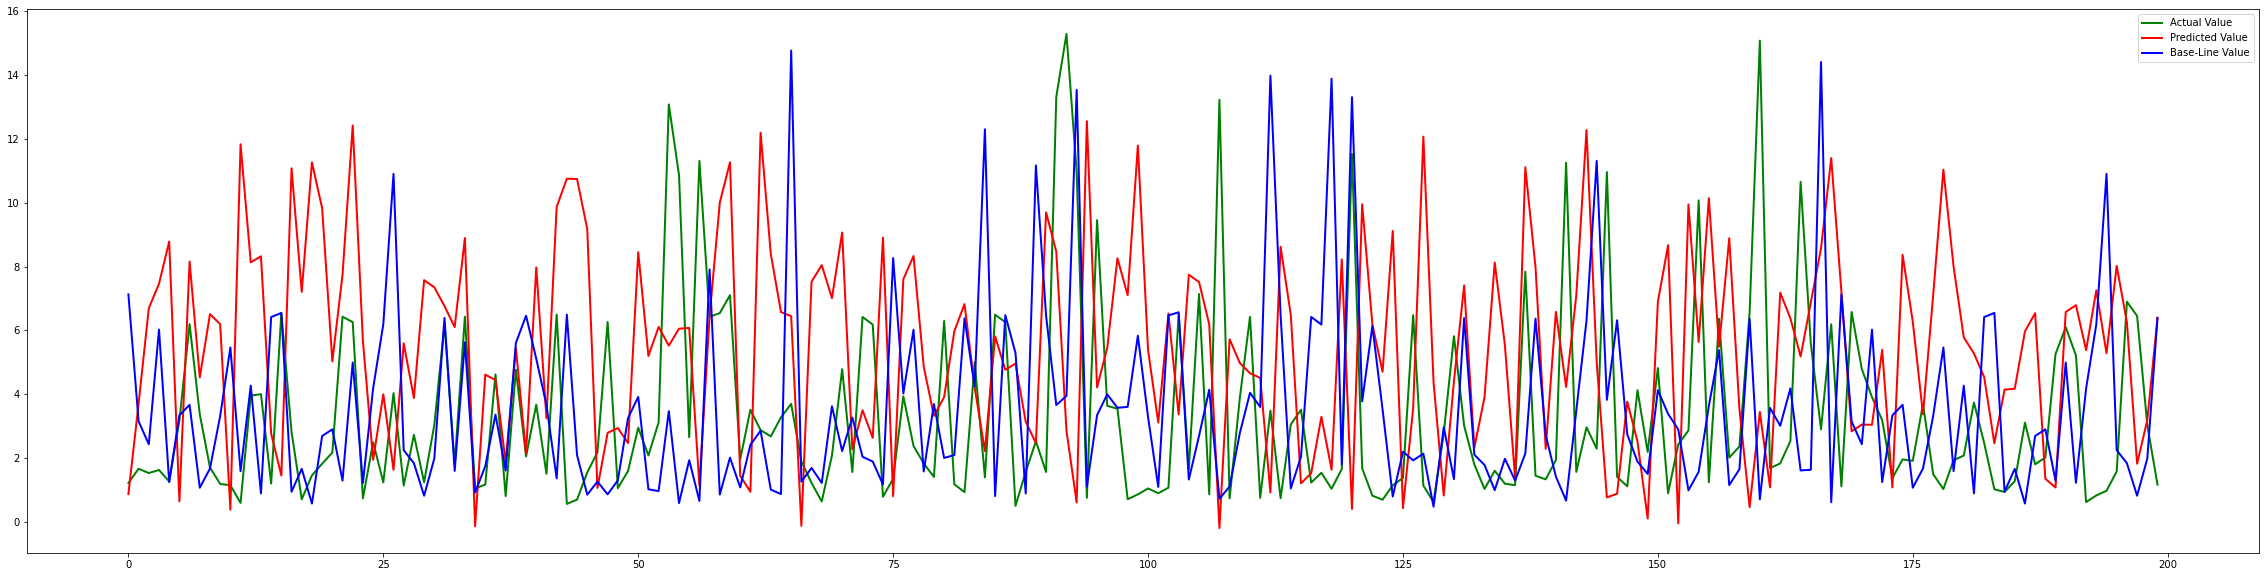

The skill score -> 0.30366578021566576


In [99]:
base_model_skill = model_helper.diplay_skill_grph(base_line_model_actual_value, 0.10, base_model_predicted_value, base_model_MAE_score, base_line_model_predicted_value, base_line_model_MAE, (200, 400))


 * Noise model skill score

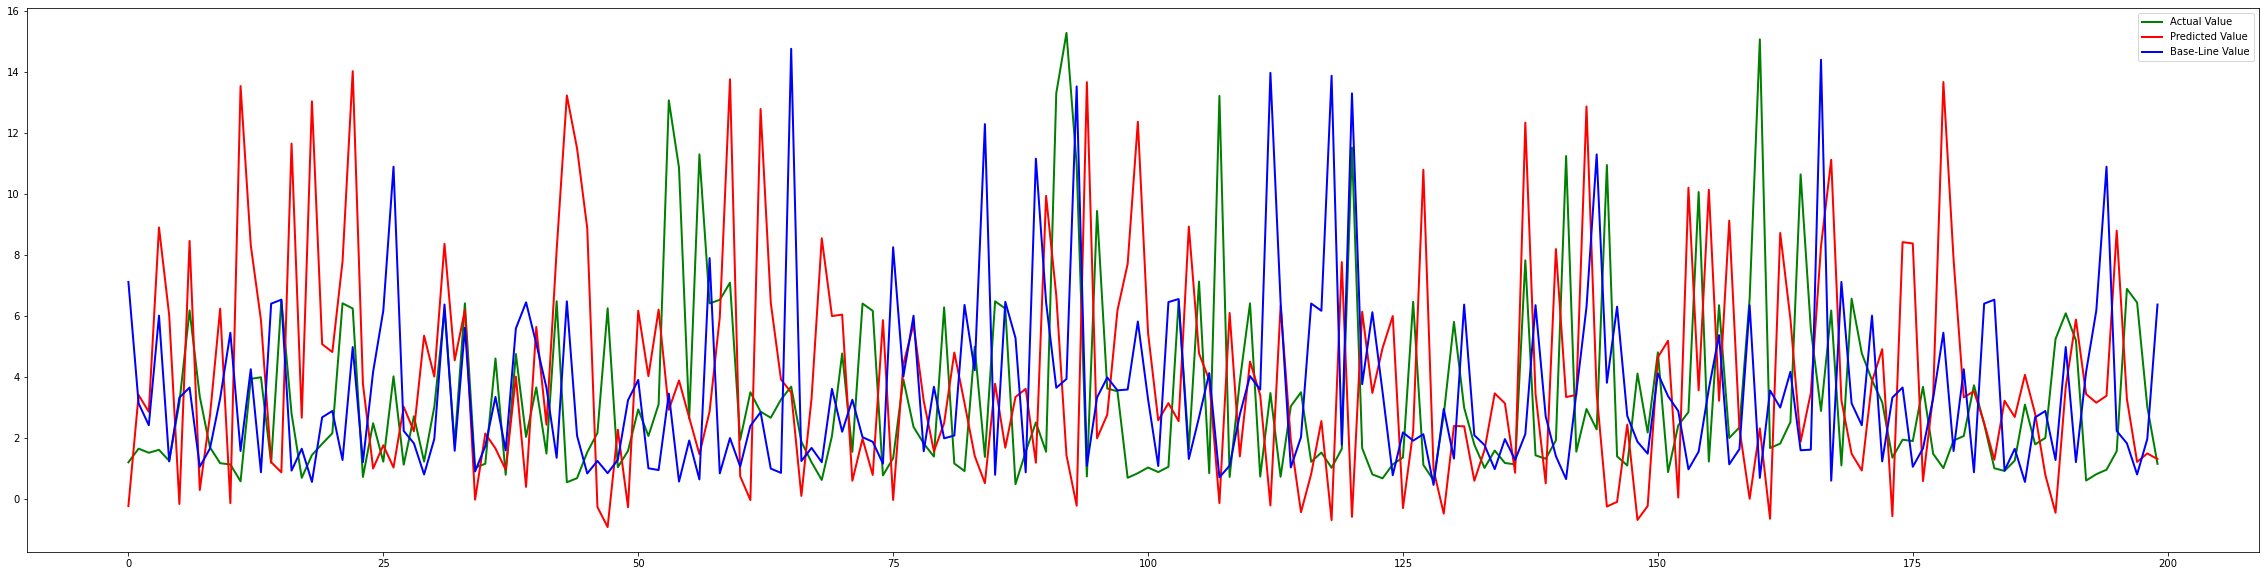

The skill score -> 0.703802641628631


In [100]:
noise_model_skill = model_helper.diplay_skill_grph(base_line_model_actual_value, 0.10, noise_model_predicted_value, noise_model_MAE_score, base_line_model_predicted_value, base_line_model_MAE, (200, 400))


 * No OSLO model skill score

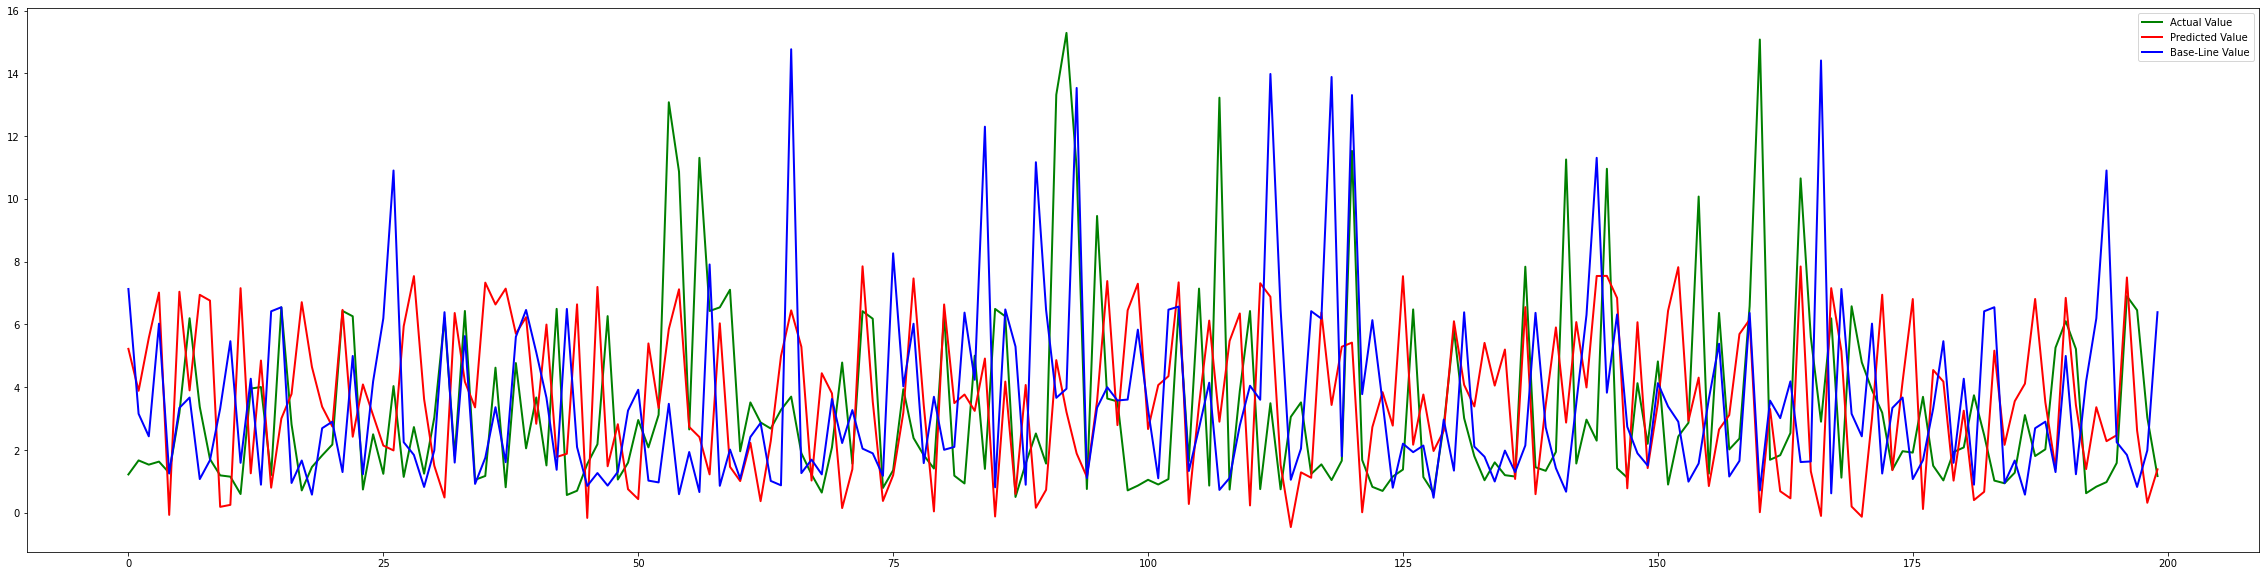

The skill score -> 0.7523924938125062


In [101]:
no_oslo_model_skill = model_helper.diplay_skill_grph(base_line_model_actual_value, 0.10, no_oslo_model_predicted_value, no_oslo_model_MAE_score, base_line_model_predicted_value, base_line_model_MAE, (200, 400))


 * Low demand model skill score

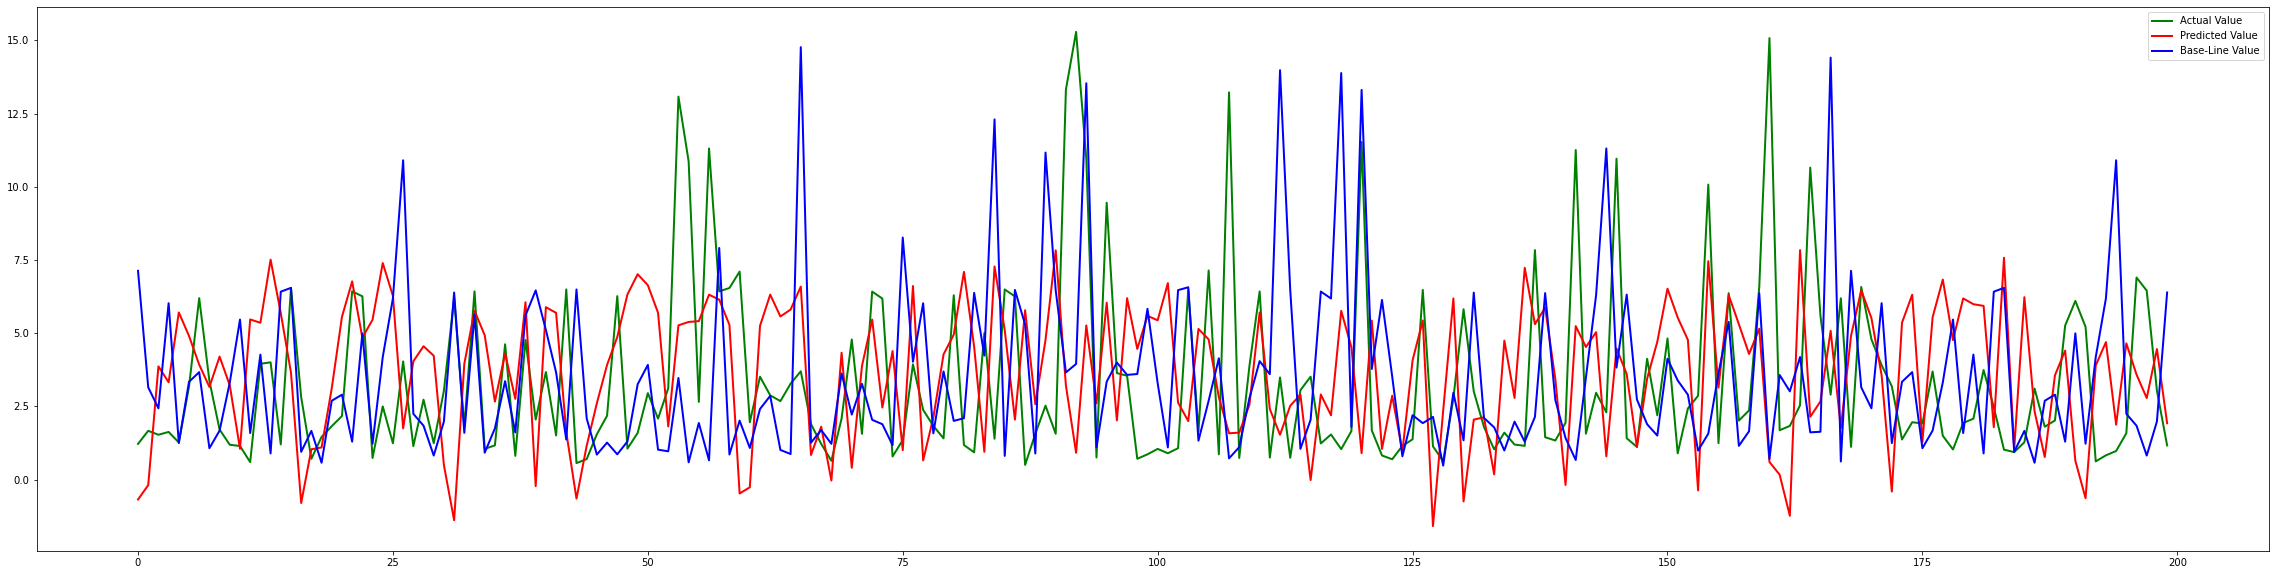

The skill score -> 0.5006718866294884


In [102]:
low_demand_model_skill = model_helper.diplay_skill_grph(base_line_model_actual_value, 0.10, low_demand_model_predicted_value, low_demand_model_MAE_score, base_line_model_predicted_value, base_line_model_MAE, (200, 400))


## Cross validation

Training...
Train_loss 0.11459890, Test loss : 0.01552886, Epoch 1
Train_loss 0.02077821, Test loss : 0.01777629, Epoch 2
Train_loss 0.02010036, Test loss : 0.01689649, Epoch 3
Train_loss 0.01988254, Test loss : 0.01650443, Epoch 4
Train_loss 0.01980101, Test loss : 0.01675002, Epoch 5
Train_loss 0.01874146, Test loss : 0.01611350, Epoch 6
Train_loss 0.01867825, Test loss : 0.01624086, Epoch 7
Train_loss 0.01868613, Test loss : 0.01613246, Epoch 8
Train_loss 0.01870447, Test loss : 0.01627667, Epoch 9
Train_loss 0.01865648, Test loss : 0.01620269, Epoch 10
Rmse lsoss -> 0.15345964357440103
Mean absolute error -> 0.7128652334213257
R2 score -> -2376.0
Fold - 1, Mean Error - 0.7128652334213257, Mini Error - 0.024237990379333496, Max Error - 1.3248484134674072
Training...
Train_loss 0.13996526, Test loss : 0.09100747, Epoch 1
Train_loss 0.09320531, Test loss : 0.09040295, Epoch 2
Train_loss 0.09321624, Test loss : 0.09028362, Epoch 3
Train_loss 0.09316564, Test loss : 0.09027912, Epoch 4


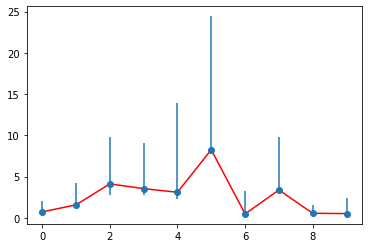

<Figure size 2880x1440 with 0 Axes>

In [85]:
matrix_cv = model_helper.cross_validation(train_split_X, train_split_Y, 10, y_scaler, (0, 2))
model_helper.plot_cross_validation(matrix_cv)
localStorage.save_to_pkl(matrix_cv, f'./data/cross_validation_data.pkl')

In [105]:
summery.update({ "Global": {
    "base_model": {
        "skill_score": base_model_skill,
        "MAE_score": base_model_MAE_score,
        "RMSE_score": base_model_RSME_score,
        "R2_score": base_model_R2_score
    },
    "noise_model": {
        "skill_score": noise_model_skill,
        "MAE_score": noise_model_MAE_score,
        "RMSE_score": noise_model_RSME_score,
        "R2_score": noise_model_R2_score
    },
    "no_oslo_model": {
        "skill_score": no_oslo_model_skill,
        "MAE_score": no_oslo_model_MAE_score,
        "RMSE_score": no_oslo_model_RSME_score,
        "R2_score": no_oslo_model_R2_score
    },
    "low_demand_model": {
        "skill_score": low_demand_model_skill,
        "MAE_score": low_demand_model_MAE_score,
        "RMSE_score": low_demand_model_RSME_score,
        "R2_score": low_demand_model_R2_score
    }
}})
localStorage.save_to_pkl(summery)

- KNN, hypothesis


- Write about the hypothesis


## Hypothesis -

    * Apply KNN on the data, and see different ponts in a graph, Find similar ponts(similarity methos) and compare their evaluation and fix the data.
    * For example, if some points falls within the same cluster and differ by their demand then their might be somw issue, in the training data
    * Also, write about how difficlut it would be to find the similar points, as time series data works differently compare to the normal data set


## Graphs

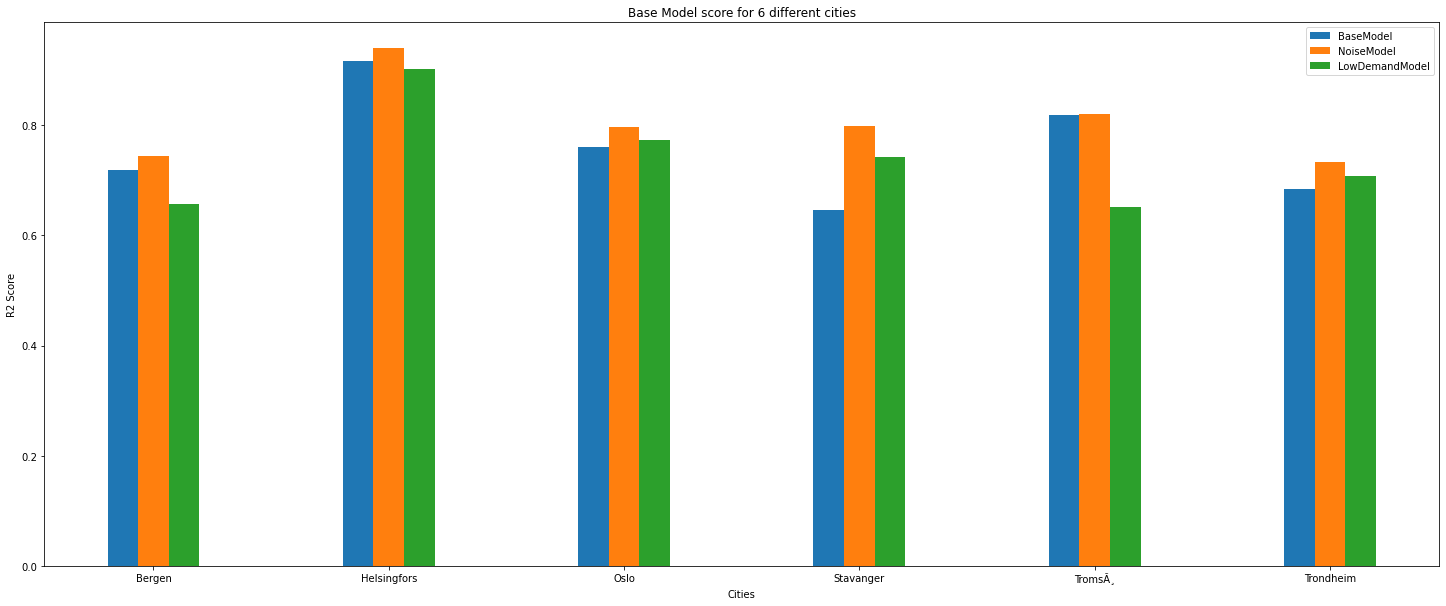

In [41]:
matrix: dict = localStorage.read_pkl()
# Define the data for the plot
data = {}
matrix_data = []
for city in matrix.keys():
    matrix_data.append([matrix[city][experiment]['skill_score'] for experiment in matrix[city].keys()])
    
matrix_data = matrix_data[0:-1]
data['BaseModel'], data['NoiseModel'], data['LowDemandModel'] = [[item[index] for item in matrix_data] for index in range(len(matrix_data[0]))]

# Define the x-axis labels and the width of each bar
labels = ['Bergen', 'Helsingfors', 'Oslo', 'Stavanger', 'TromsÃ¸', 'Trondheim']
bar_width = 0.13

# Create a numpy array of the x-axis positions for each group of bars
x_pos = np.arange(len(labels))

# Create a figure and axis object
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (25, 10)

# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(data.items()):
   # Calculate the x-axis position for the current group of bars
   pos = x_pos + (i * bar_width)
   # Create a set of bars for the current group
   ax.bar(pos, values, width=bar_width, label=group)

# Set the x-axis labels and tick positions
ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
ax.set_xticklabels(labels)

# Add a legend to the plot
ax.legend()

# Add axis labels and a title to the plot
ax.set_xlabel('Cities')
ax.set_ylabel('R2 Score')
ax.set_title('Base Model score for 6 different cities')

# Show the plot
plt.show()

 * Cross validation graphs